In [1]:
import numpy as np
import qsotools.xq100io as xio
import matplotlib.pyplot as plt
import qsotools.fiducial as fid
import fitsio

In [2]:
xq100_list_fits = fitsio.FITS("../py/qsotools/tables/xq100_thework.fits")[1]
i = xq100_list_fits.where("OBJECT == 'BR J0006-6208'")[0]
xq100_list_fits[i]['Z_QSO']

4.4399548

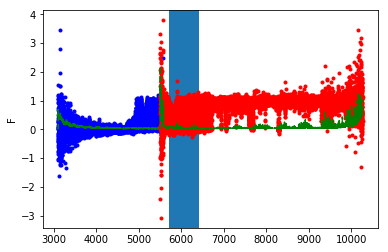

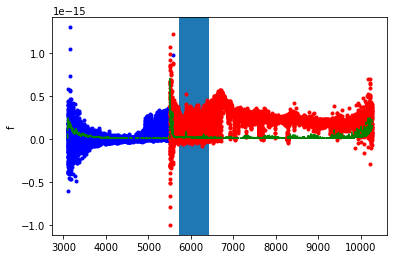

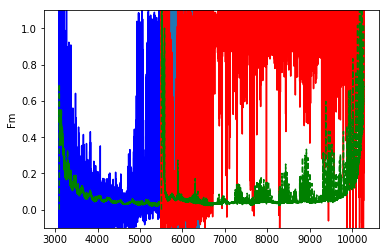

In [4]:
x1f_uvb = xio.XQ100Fits("/Users/nk452/repos/data/xq100/uvb/J0006-6208_uvb.fits")
x1f_vis = xio.XQ100Fits("/Users/nk452/repos/data/xq100/vis/J0006-6208_vis.fits")

# Plot normalized flux
plt.plot(x1f_uvb.wave, x1f_uvb.flux, "b.")
plt.plot(x1f_uvb.wave, x1f_uvb.error, "g--")

plt.plot(x1f_vis.wave, x1f_vis.flux, "r.")
plt.plot(x1f_vis.wave, x1f_vis.error, "g--")
plt.axvspan(fid.LYA_FIRST_WVL*(1+x1f_uvb.z_qso), fid.LYA_LAST_WVL*(1+x1f_uvb.z_qso))
plt.ylabel("F")
plt.show()

# Plot flux
cu = x1f_uvb.cont
plt.plot(x1f_uvb.wave, x1f_uvb.flux*cu, "b.")
plt.plot(x1f_uvb.wave, x1f_uvb.error*cu, "g--")

cv = x1f_vis.cont
plt.plot(x1f_vis.wave, x1f_vis.flux*cv, "r.")
plt.plot(x1f_vis.wave, x1f_vis.error*cv, "g--")
plt.ylabel("f")
plt.axvspan(fid.LYA_FIRST_WVL*(1+x1f_uvb.z_qso), fid.LYA_LAST_WVL*(1+x1f_uvb.z_qso))
plt.show()

# Remove f<1e-15
fu = x1f_uvb.flux*cu
fumark = fu > -1e-15
fv = x1f_vis.flux*cv
fvmark = fv > -1e-15

plt.plot(x1f_uvb.wave[fumark], x1f_uvb.flux[fumark], "b-")
plt.plot(x1f_uvb.wave[fumark], x1f_uvb.error[fumark], "g--")

plt.plot(x1f_vis.wave[fvmark], x1f_vis.flux[fvmark], "r-")
plt.plot(x1f_vis.wave[fvmark], x1f_vis.error[fvmark], "g--")
plt.axvspan(fid.LYA_FIRST_WVL*(1+x1f_uvb.z_qso), fid.LYA_LAST_WVL*(1+x1f_uvb.z_qso))
plt.ylim(-0.1, 1.1)
plt.ylabel("Fm")
plt.show()

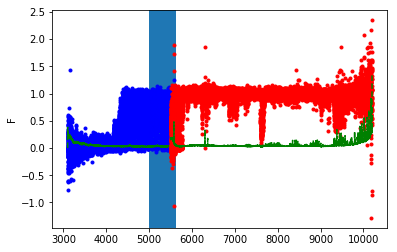

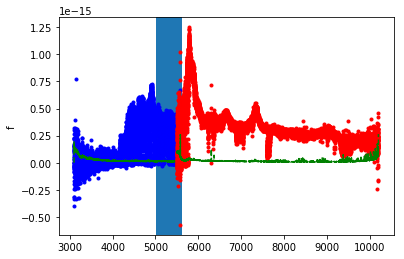

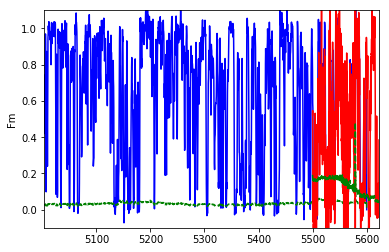

In [6]:
x1f_uvb = xio.XQ100Fits("/Users/nk452/repos/data/xq100/uvb/J1126-0124_uvb.fits")
x1f_vis = xio.XQ100Fits("/Users/nk452/repos/data/xq100/vis/J1126-0124_vis.fits")

# Plot normalized flux
plt.plot(x1f_uvb.wave, x1f_uvb.flux, "b.")
plt.plot(x1f_uvb.wave, x1f_uvb.error, "g--")

plt.plot(x1f_vis.wave, x1f_vis.flux, "r.")
plt.plot(x1f_vis.wave, x1f_vis.error, "g--")
plt.ylabel("F")
plt.axvspan(fid.LYA_FIRST_WVL*(1+x1f_uvb.z_qso), fid.LYA_LAST_WVL*(1+x1f_uvb.z_qso))
plt.show()

# Plot flux
cu = x1f_uvb.cont
plt.plot(x1f_uvb.wave, x1f_uvb.flux*cu, "b.")
plt.plot(x1f_uvb.wave, x1f_uvb.error*cu, "g--")

cv = x1f_vis.cont
plt.plot(x1f_vis.wave, x1f_vis.flux*cv, "r.")
plt.plot(x1f_vis.wave, x1f_vis.error*cv, "g--")
plt.ylabel("f")
plt.axvspan(fid.LYA_FIRST_WVL*(1+x1f_uvb.z_qso), fid.LYA_LAST_WVL*(1+x1f_uvb.z_qso))
plt.show()

# Remove f<1e-15
fu = x1f_uvb.flux*cu
fumark = fu > -1e-15
fv = x1f_vis.flux*cv
fvmark = fv > -1e-15

plt.plot(x1f_uvb.wave[fumark], x1f_uvb.flux[fumark], "b-")
plt.plot(x1f_uvb.wave[fumark], x1f_uvb.error[fumark], "g--")

plt.plot(x1f_vis.wave[fvmark], x1f_vis.flux[fvmark], "r-")
plt.plot(x1f_vis.wave[fvmark], x1f_vis.error[fvmark], "g--")

plt.xlim(fid.LYA_FIRST_WVL*(1+x1f_uvb.z_qso), fid.LYA_LAST_WVL*(1+x1f_uvb.z_qso))
plt.ylim(-0.1, 1.1)

plt.ylabel("Fm")
plt.show()

In [7]:
import os

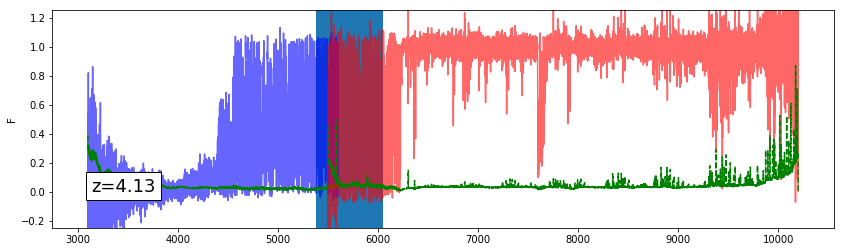

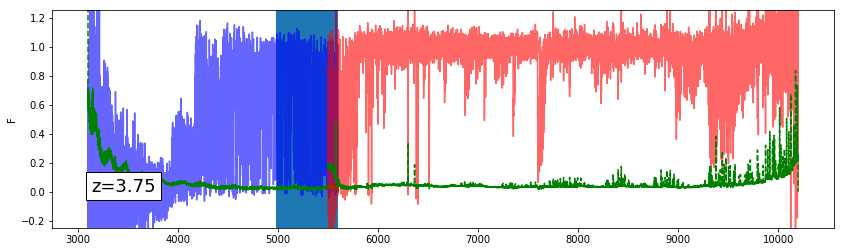

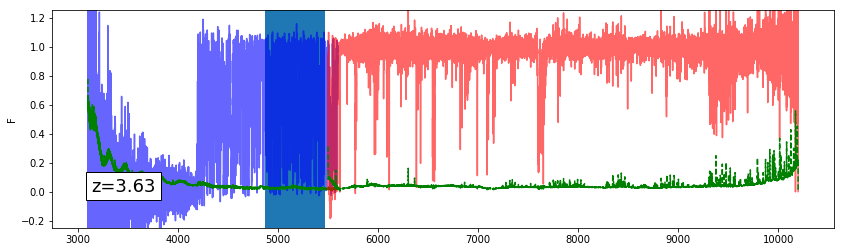

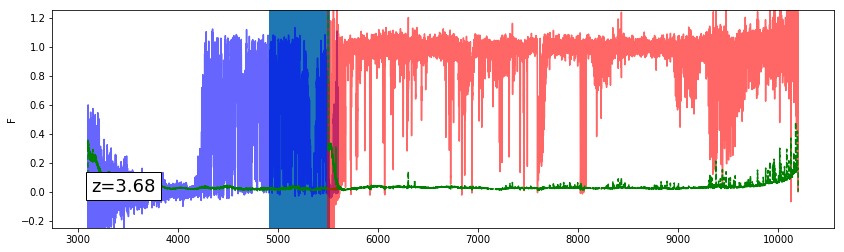

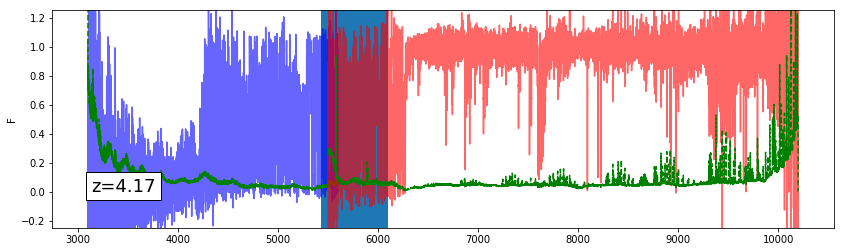

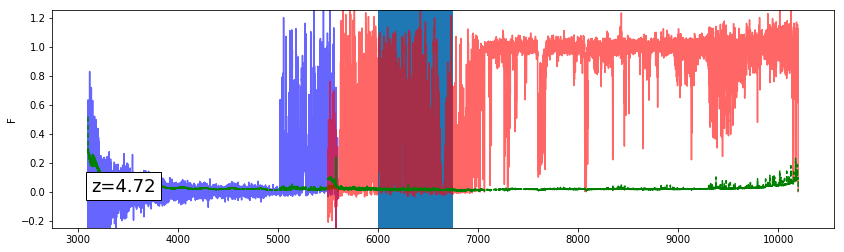

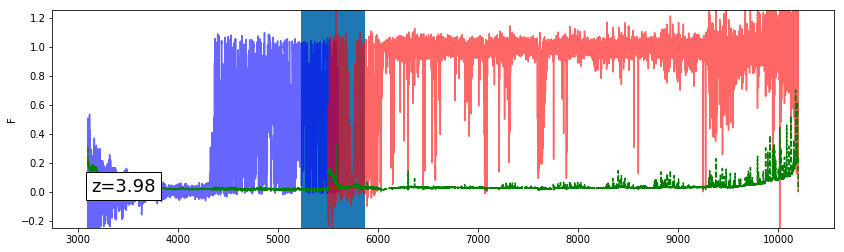

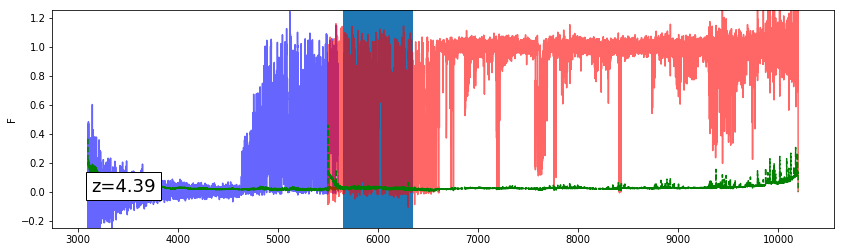

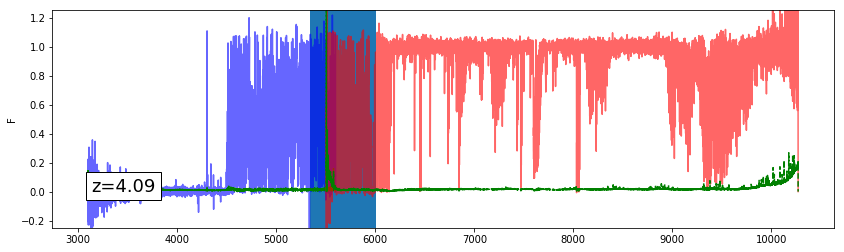

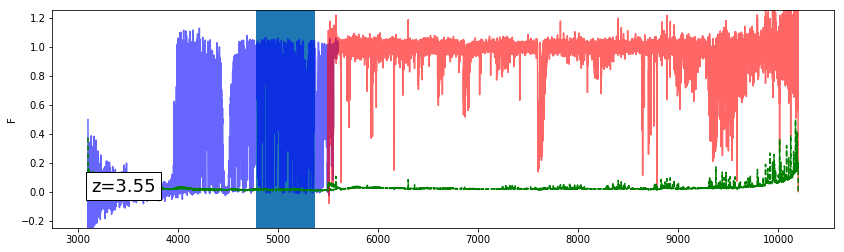

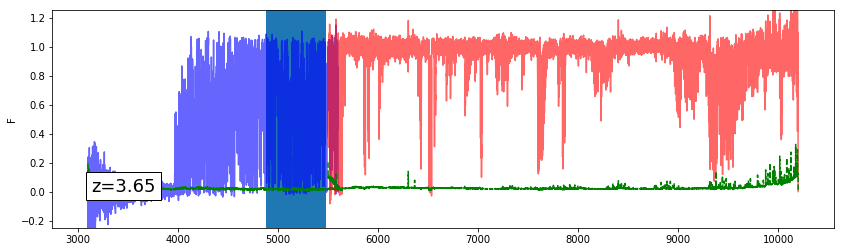

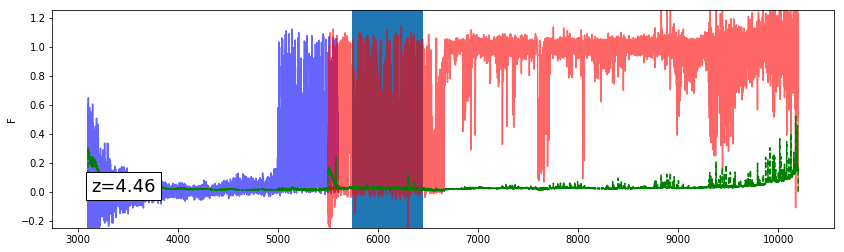

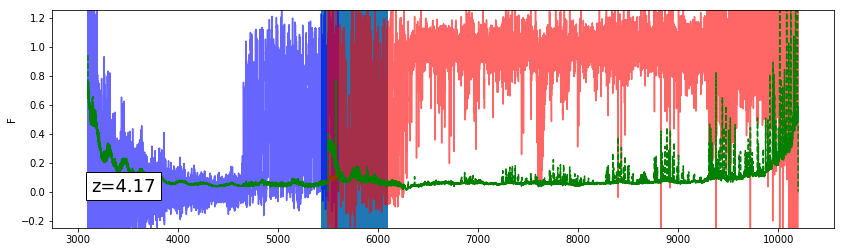

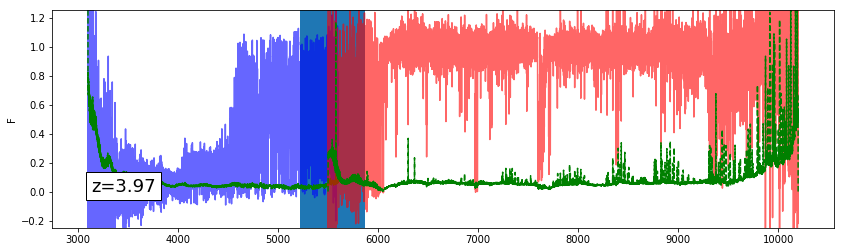

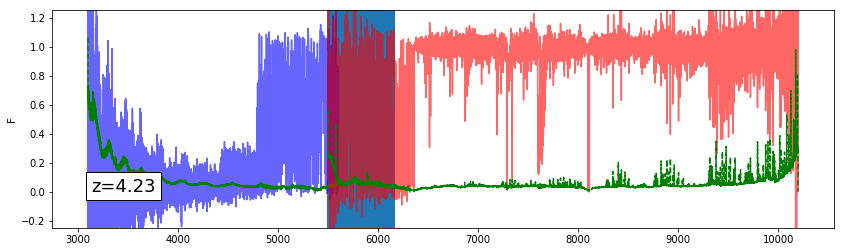

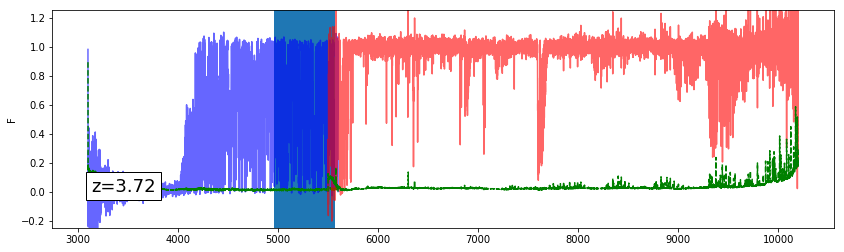

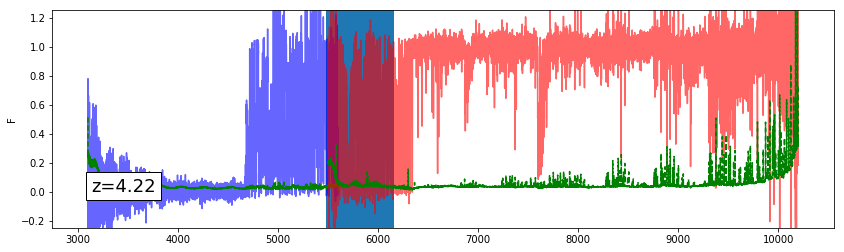

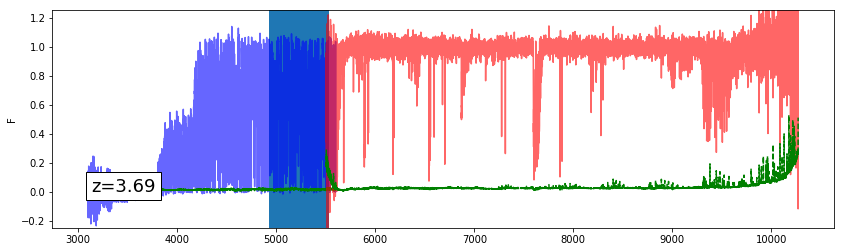

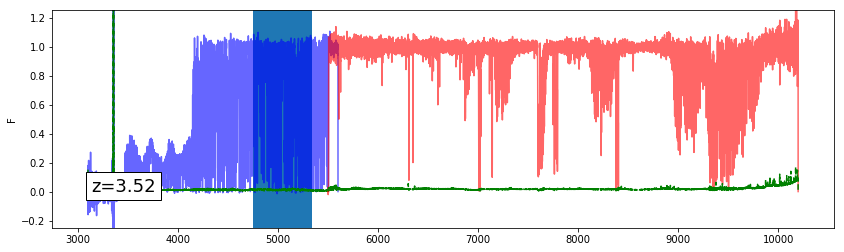

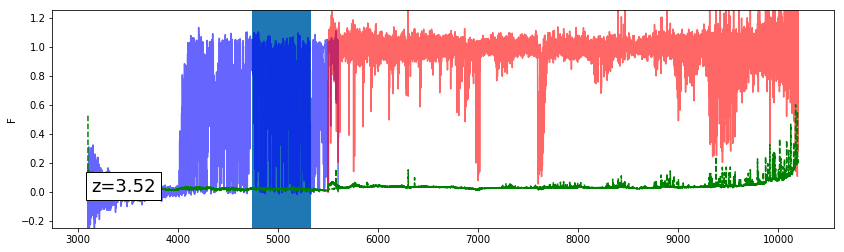

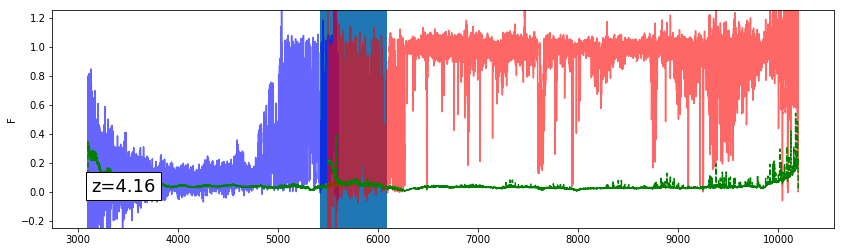

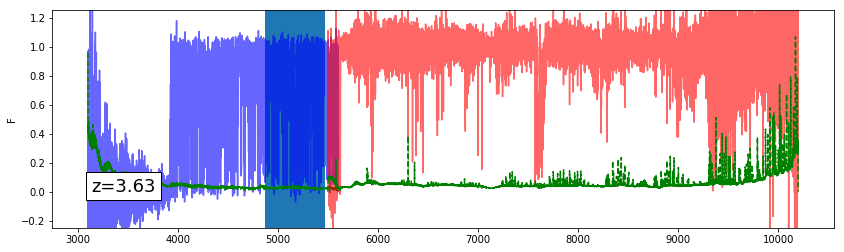

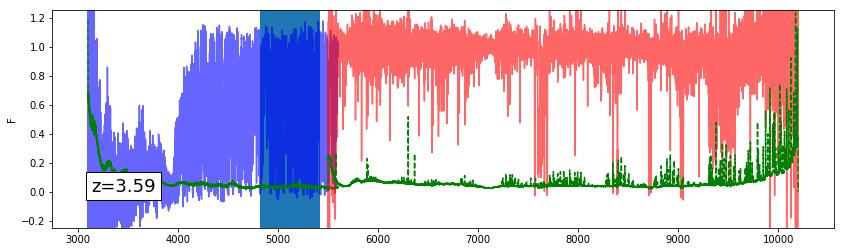

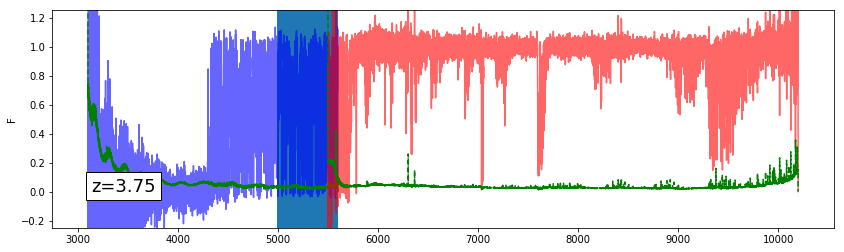

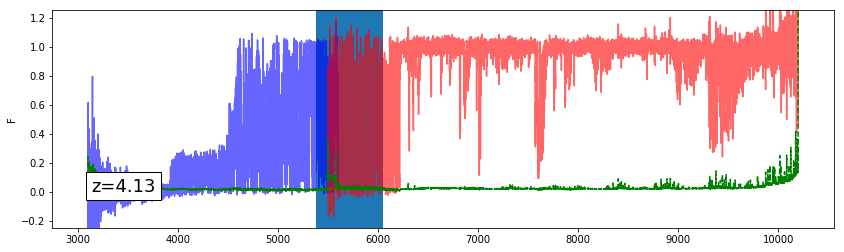

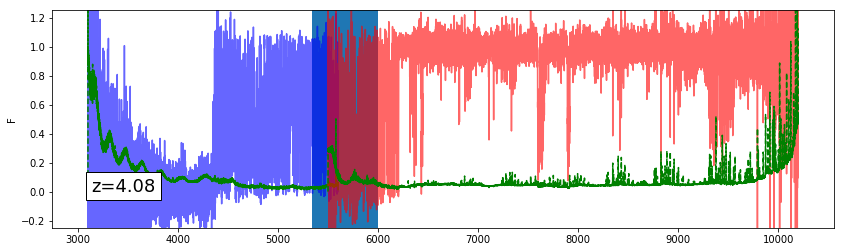

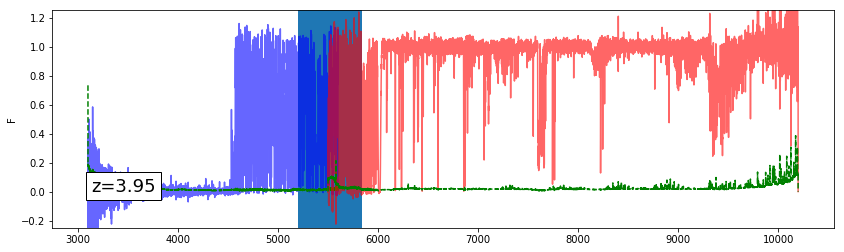

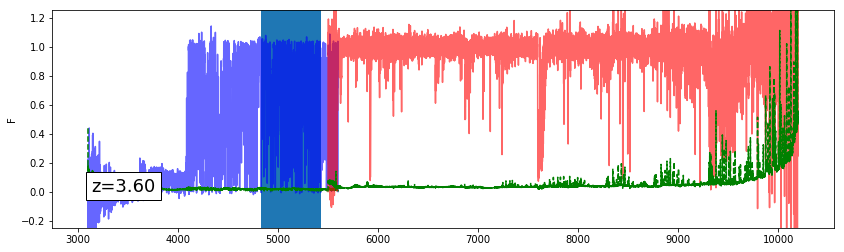

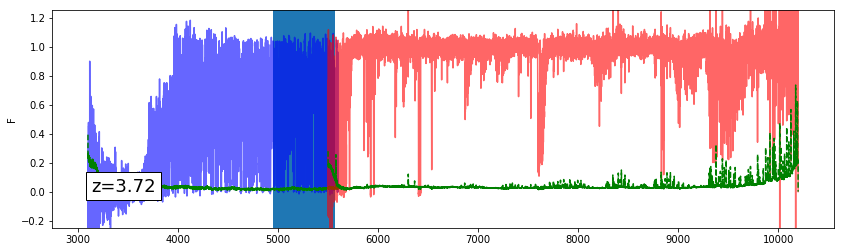

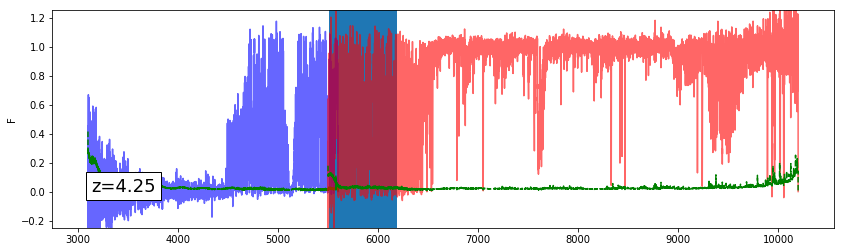

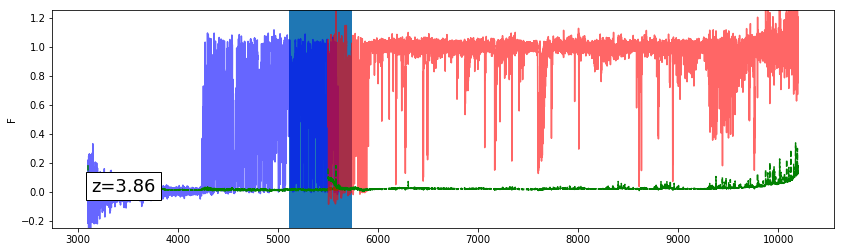

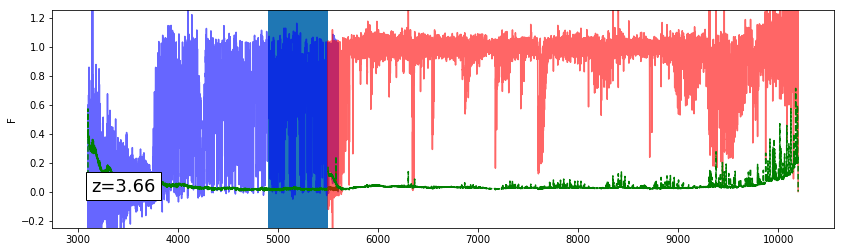

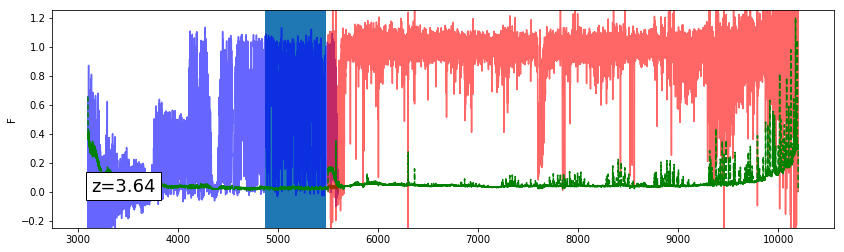

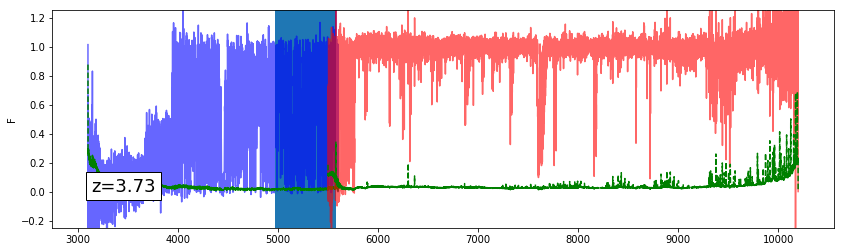

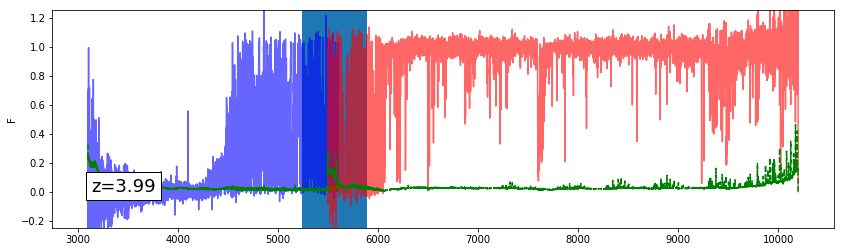

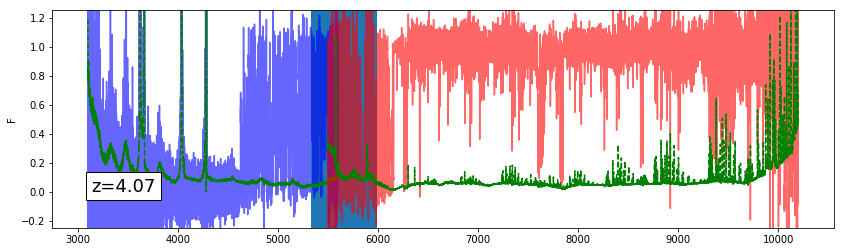

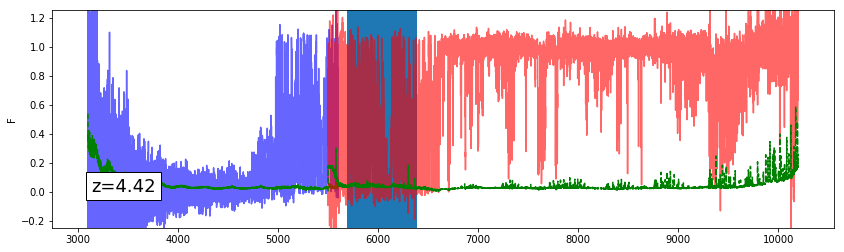

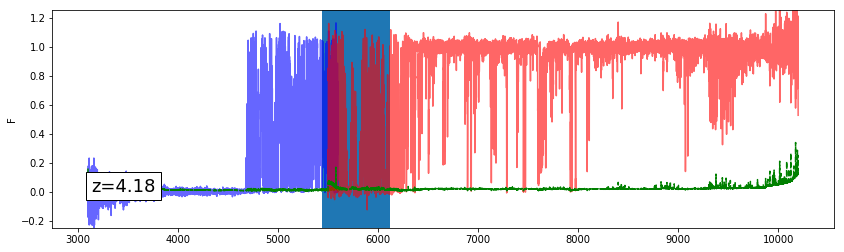

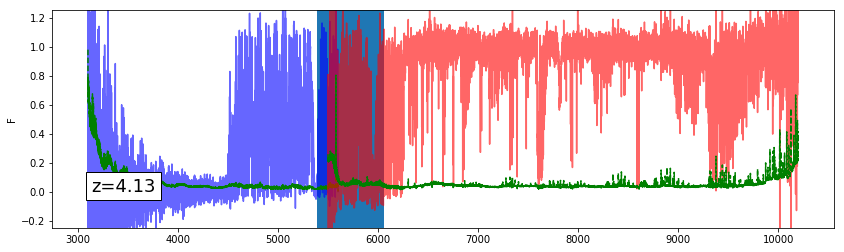

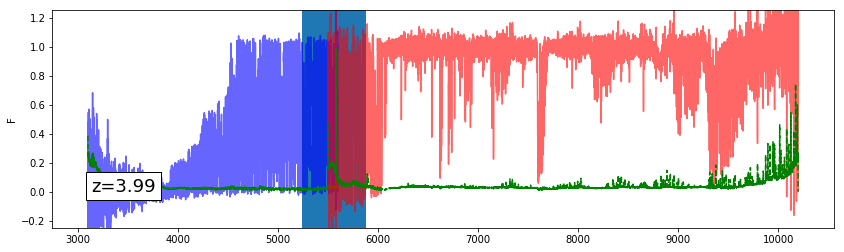

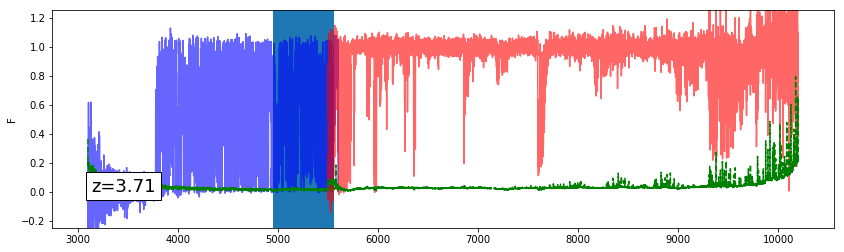

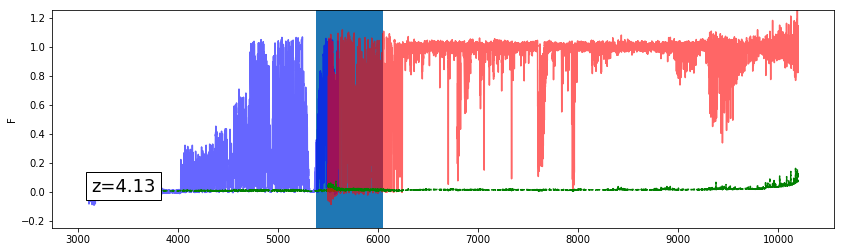

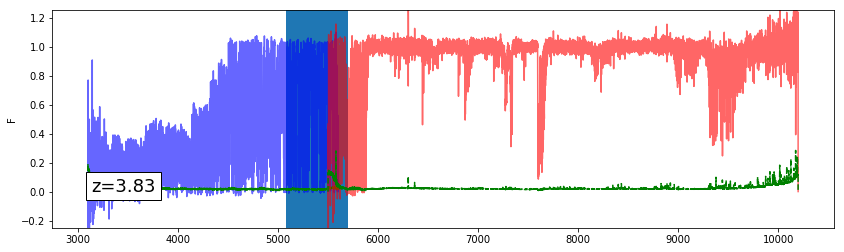

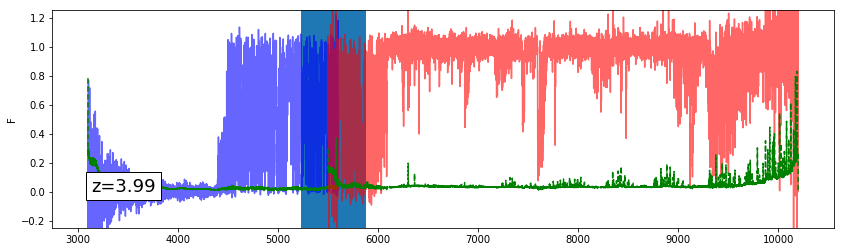

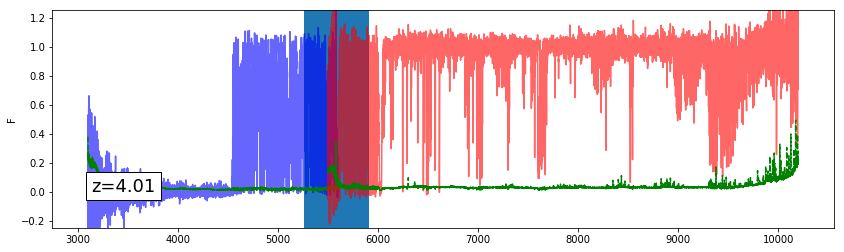

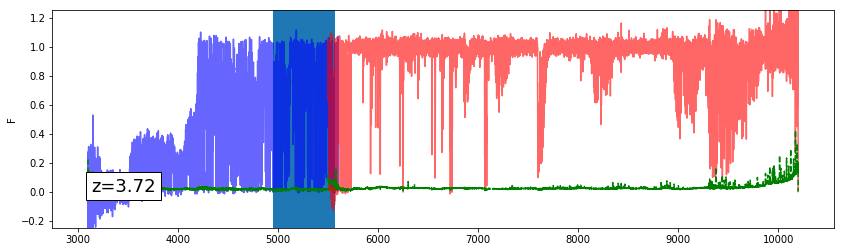

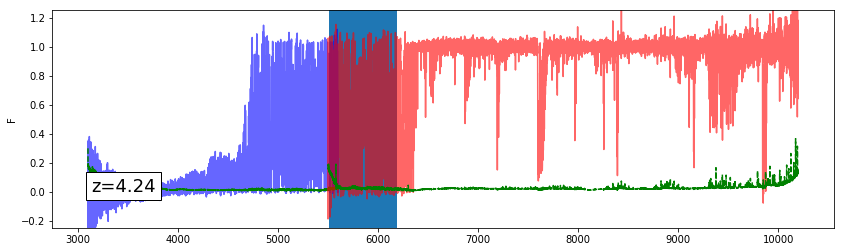

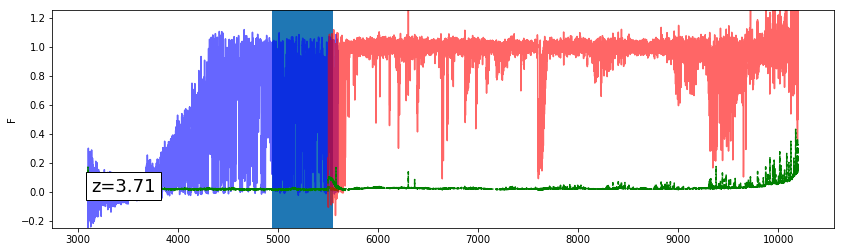

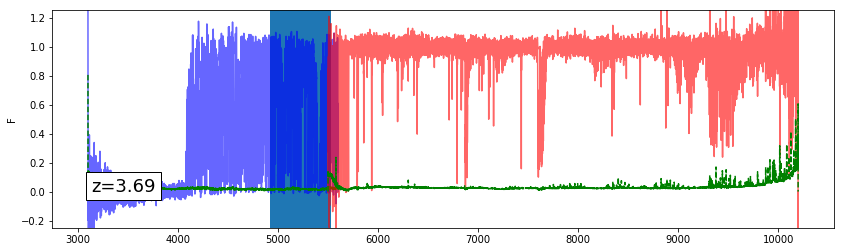

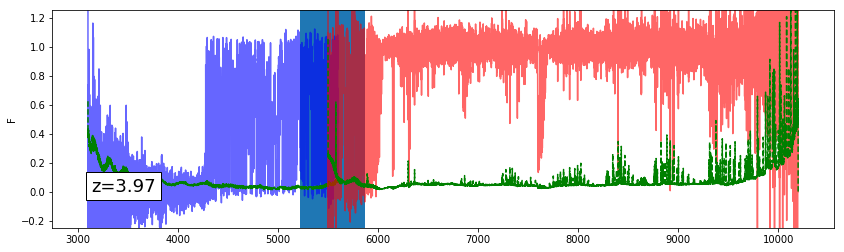

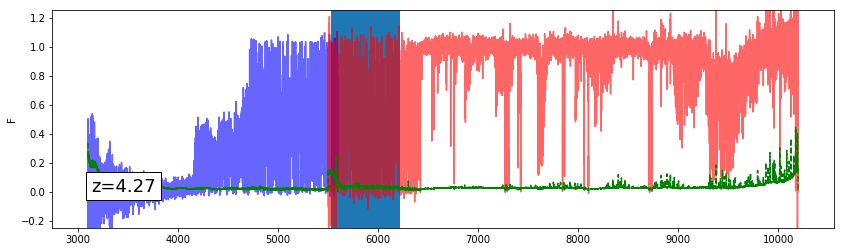

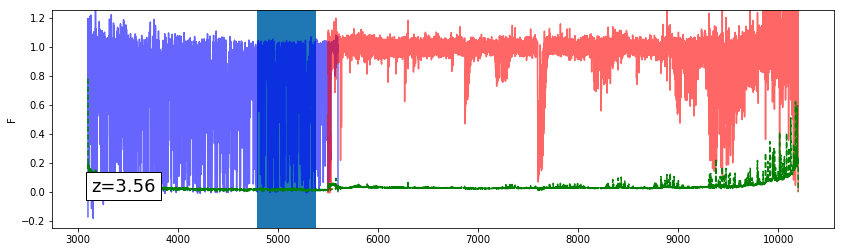

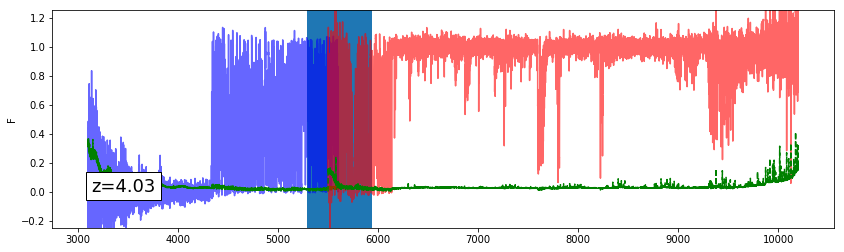

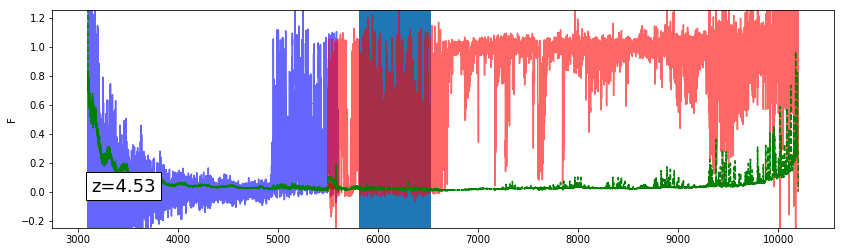

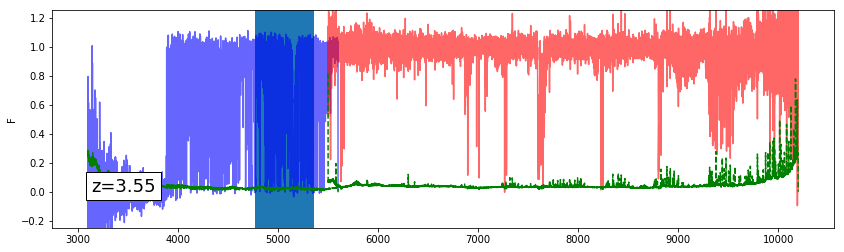

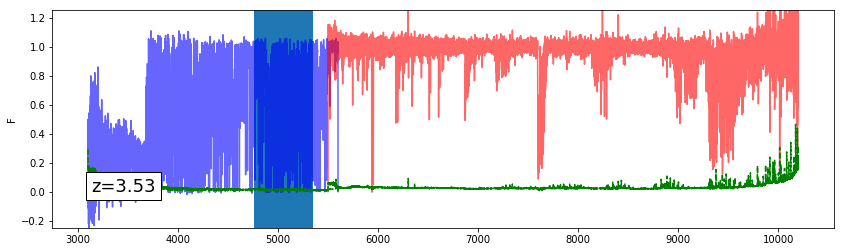

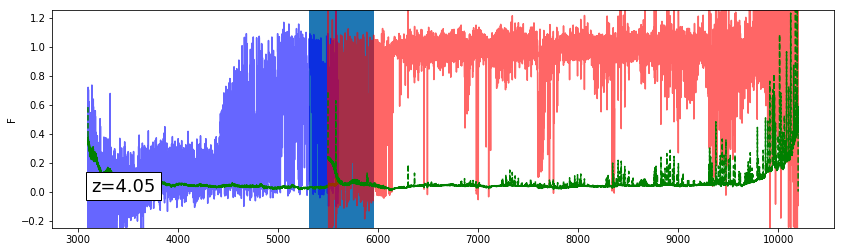

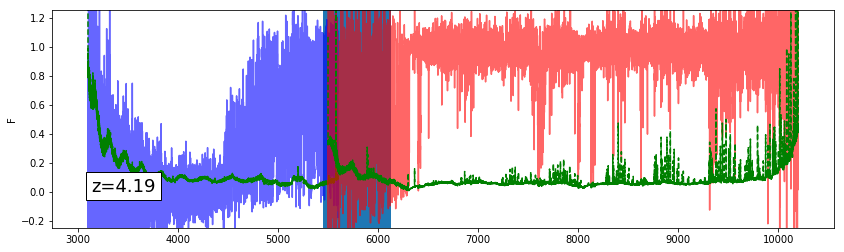

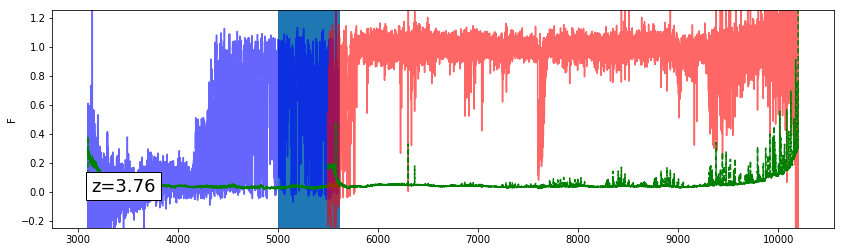

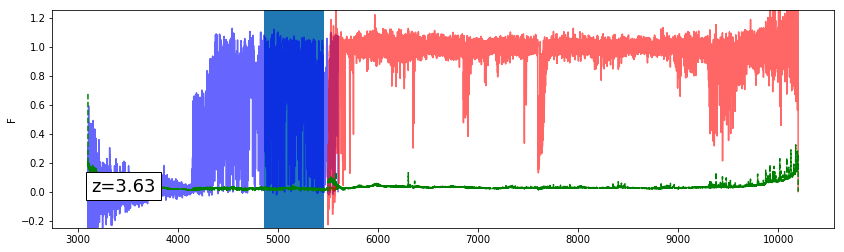

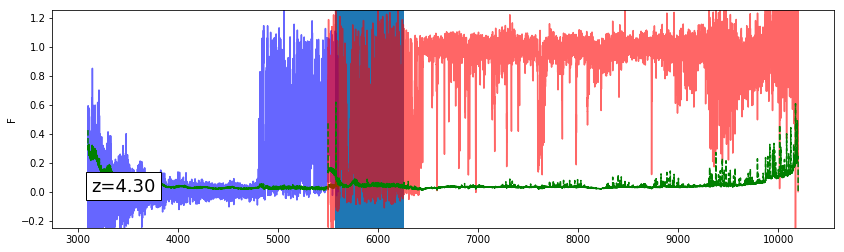

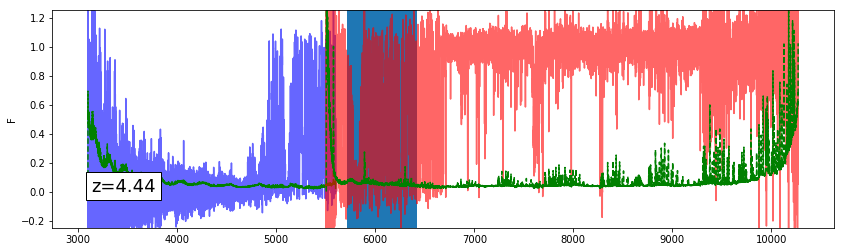

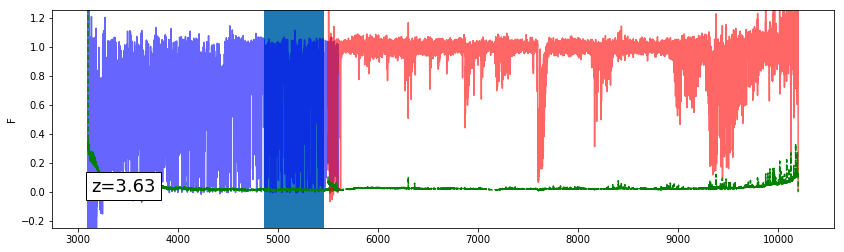

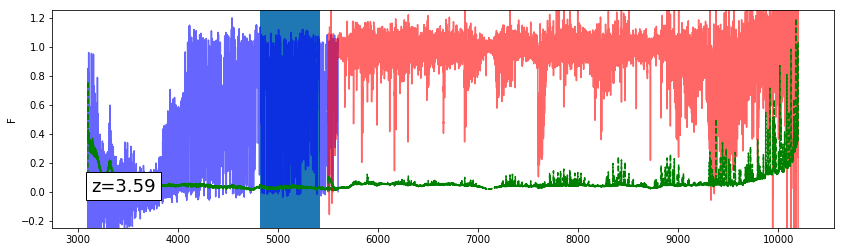

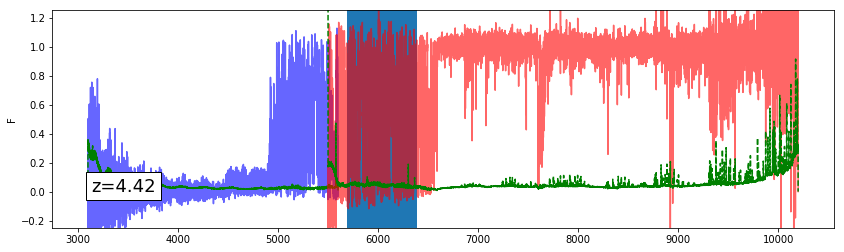

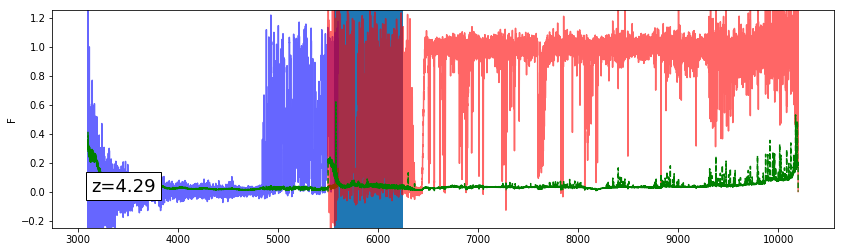

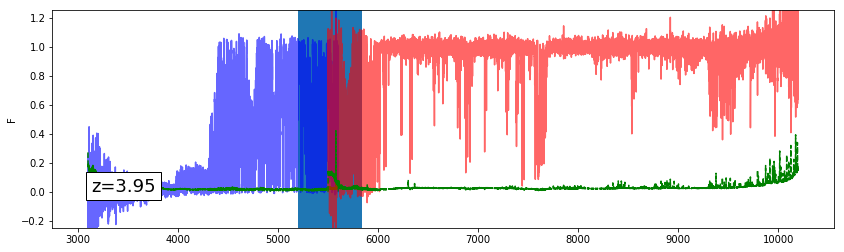

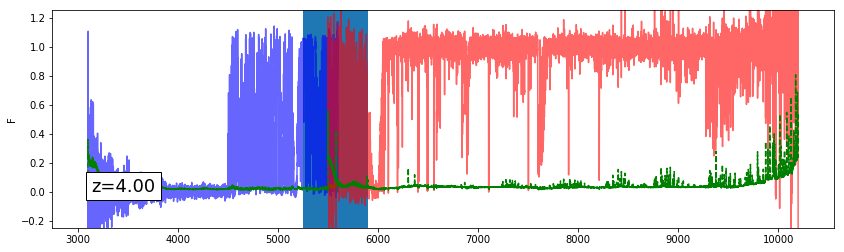

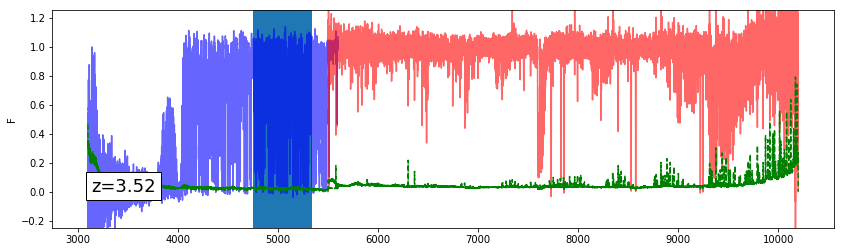

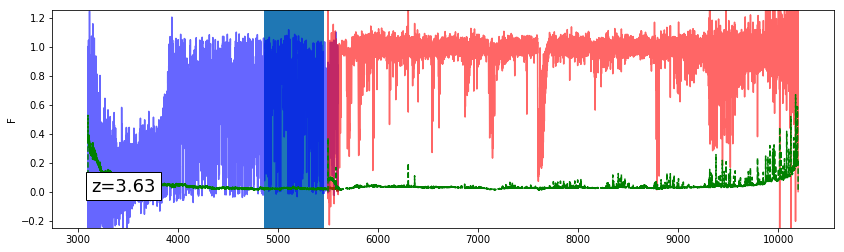

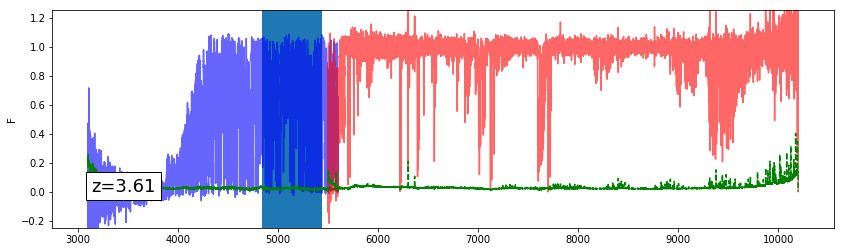

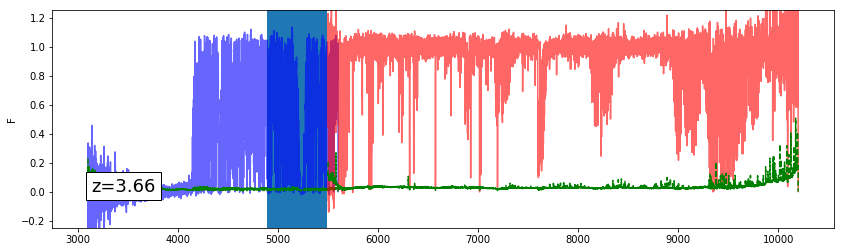

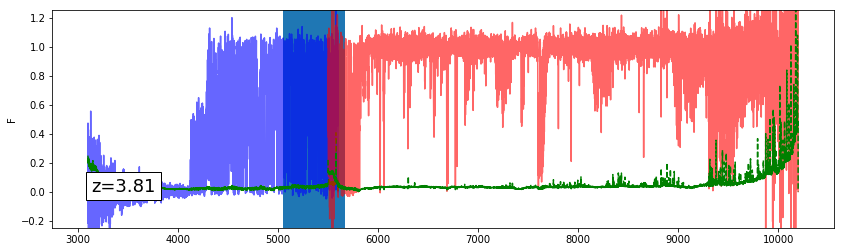

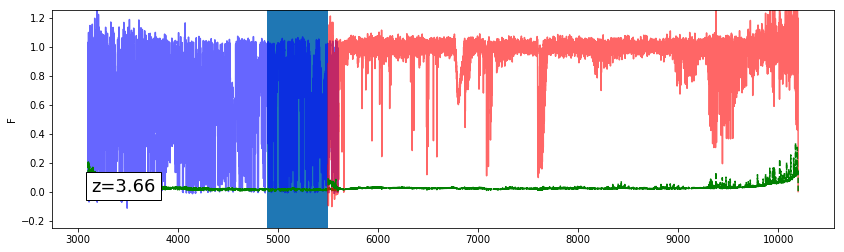

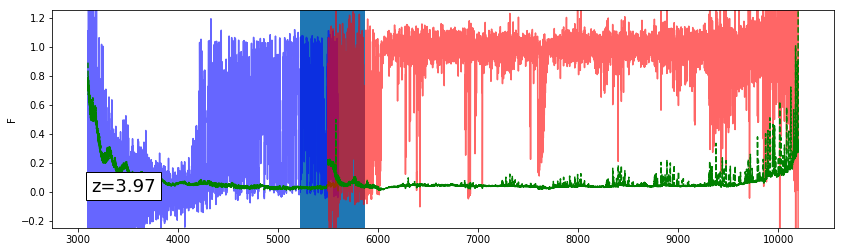

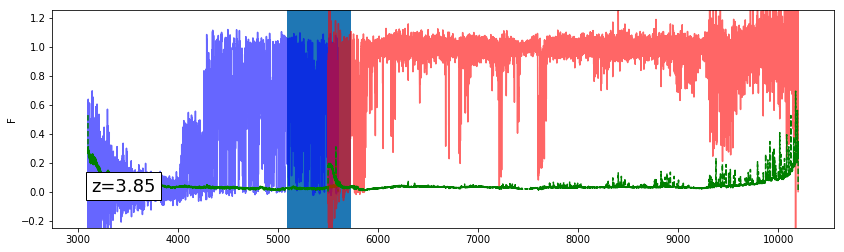

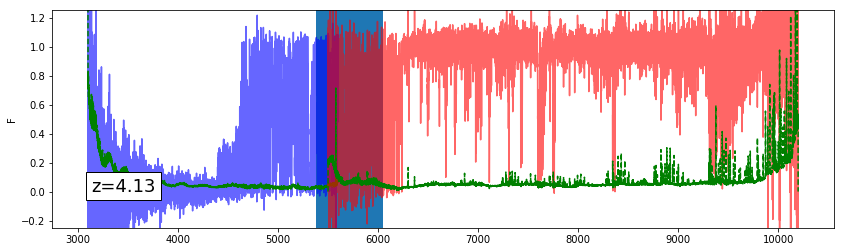

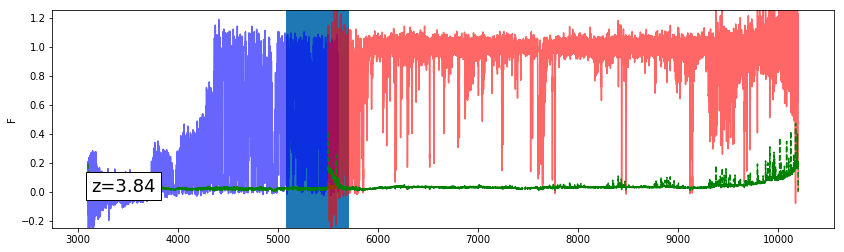

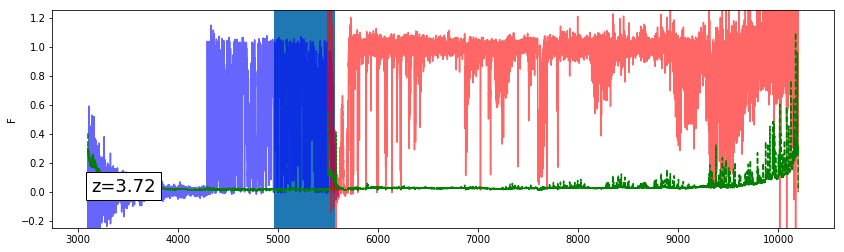

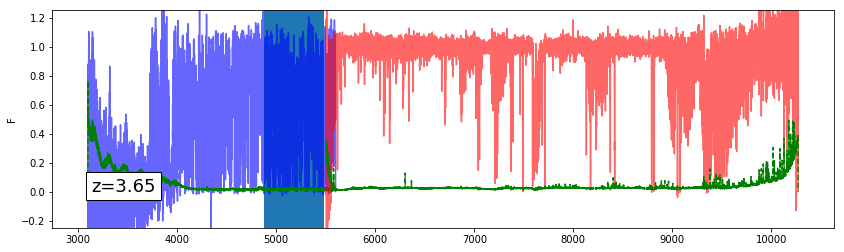

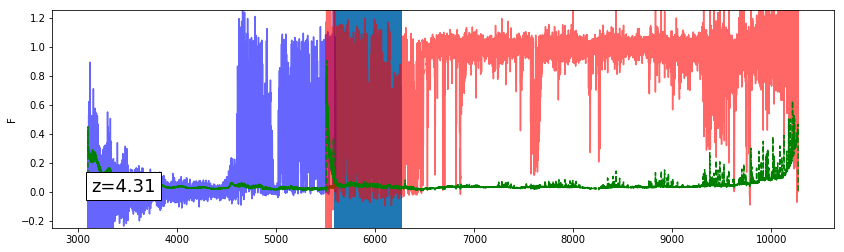

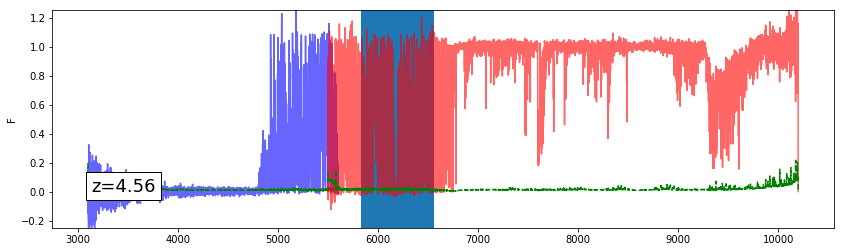

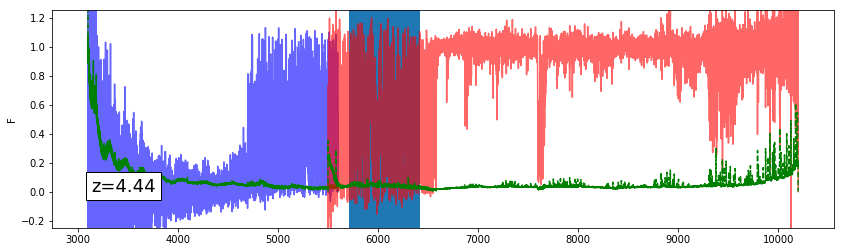

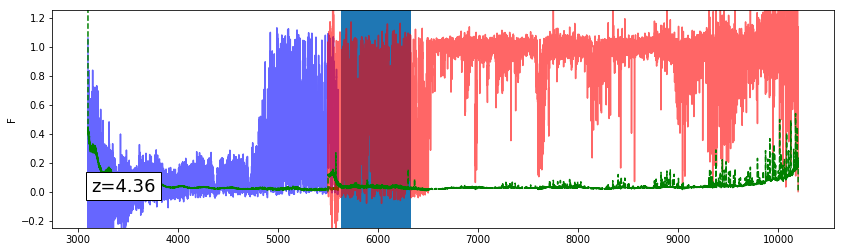

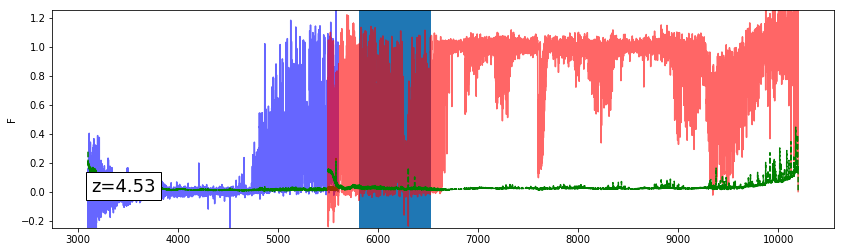

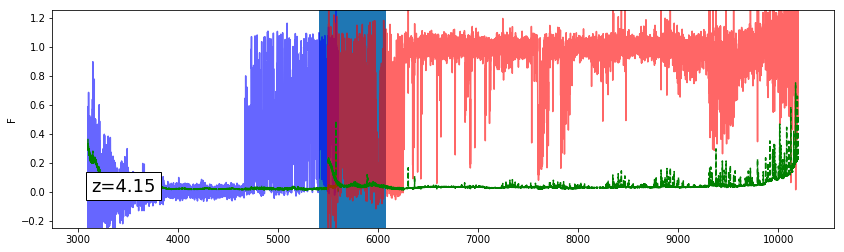

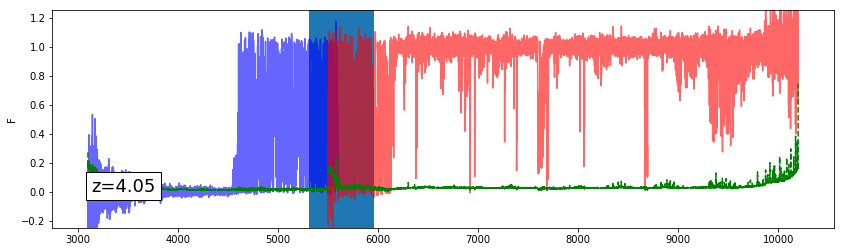

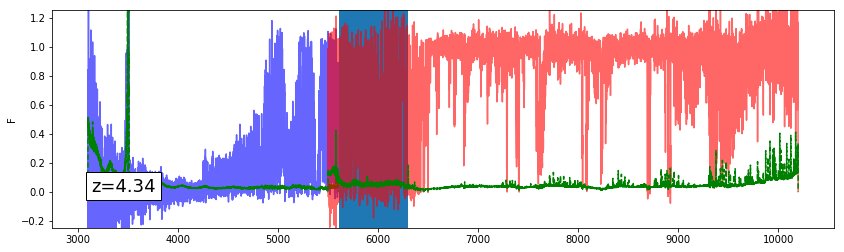

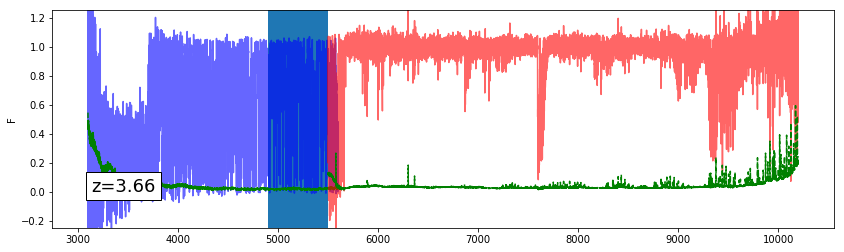

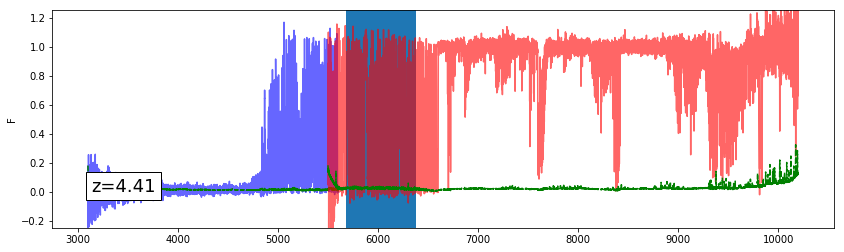

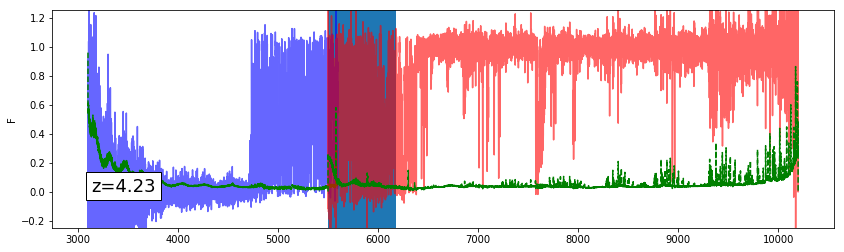

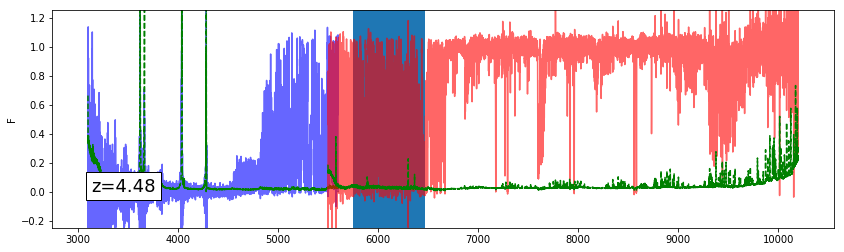

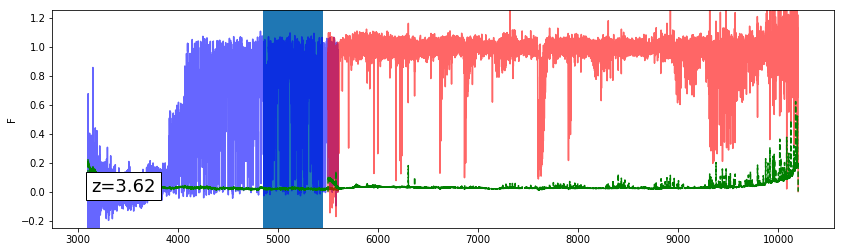

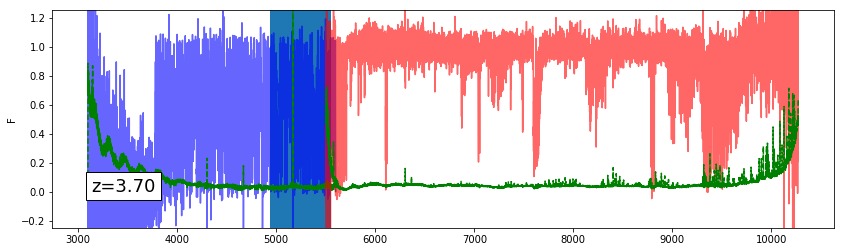

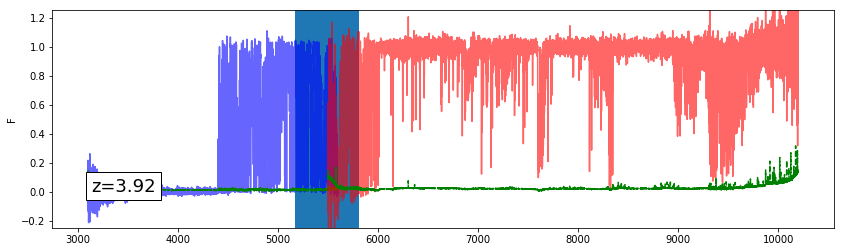

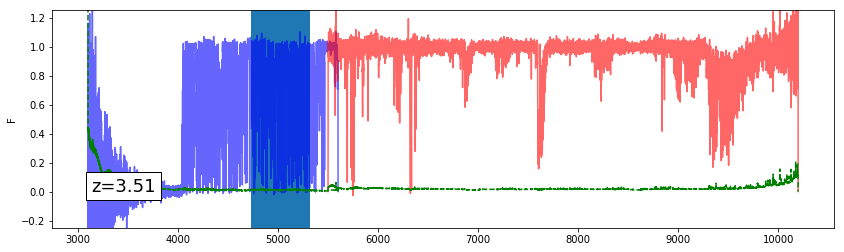

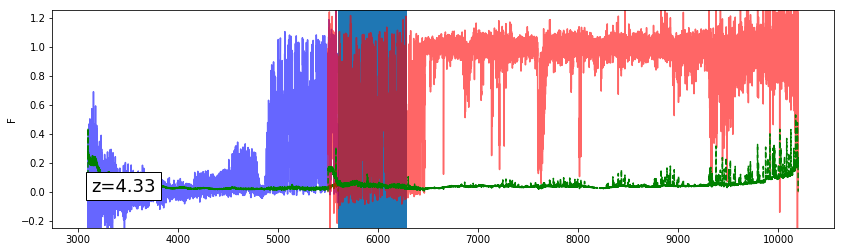

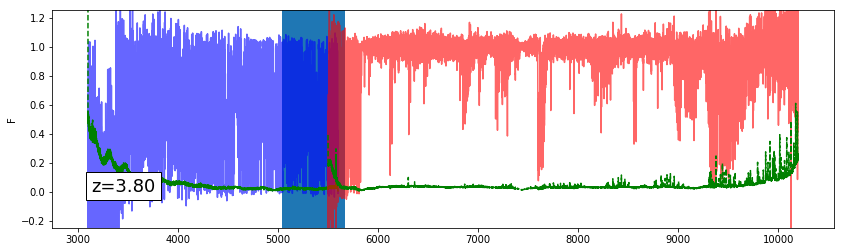

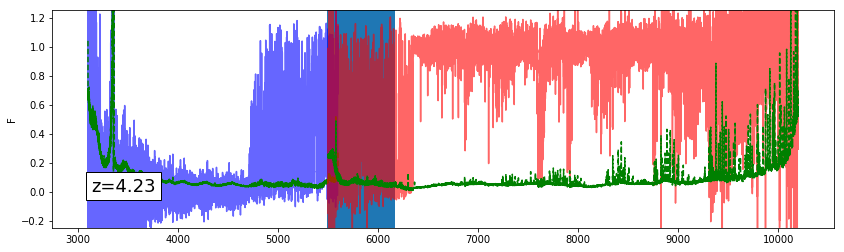

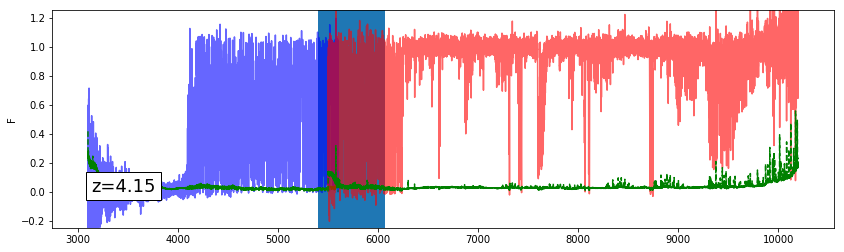

In [8]:
for f in os.listdir("/Users/nk452/repos/data/xq100/uvb/"):
    if not f.endswith(".fits"):
        continue
    
    uvbpath = os.path.join("/Users/nk452/repos/data/xq100/uvb/", f)
    vispath = uvbpath.replace("uvb","vis")
    ufits = xio.XQ100Fits(uvbpath)
    vfits = xio.XQ100Fits(vispath)
    
    fig = plt.figure(figsize=(14,4))
    plt.plot(ufits.wave, ufits.flux, "b-", alpha=0.6)
    plt.plot(ufits.wave, ufits.error, "g--")

    plt.plot(vfits.wave, vfits.flux, "r-", alpha=0.6)
    plt.plot(vfits.wave, vfits.error, "g--")
    plt.ylabel("F")
    plt.ylim(-0.25, 1.25)
    plt.axvspan(fid.LYA_FIRST_WVL*(1+ufits.z_qso), fid.LYA_LAST_WVL*(1+ufits.z_qso))
    ax = plt.gca()
    ax.text(0.05, 0.15, "z=%.2f"%ufits.z_qso, transform=ax.transAxes, fontsize=18, \
            verticalalignment='bottom', horizontalalignment='left', bbox={'facecolor':'white', 'pad':5})
    plt.show()
    

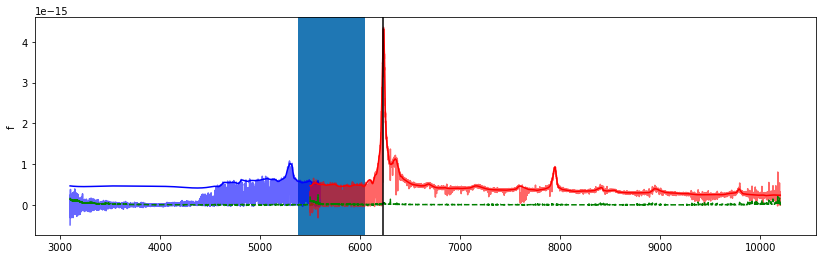

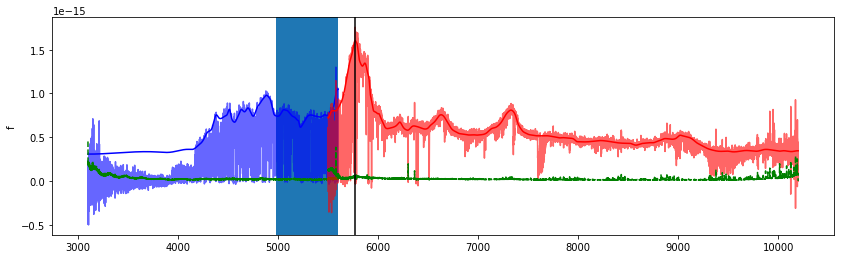

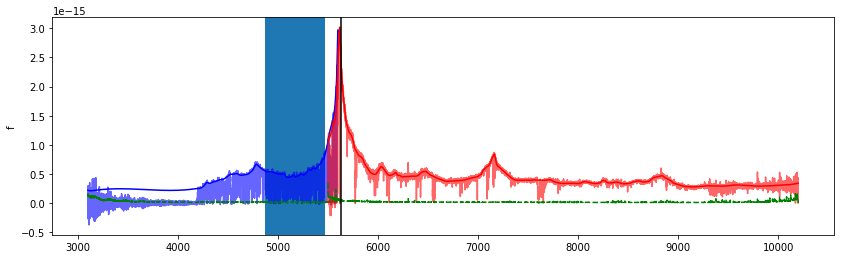

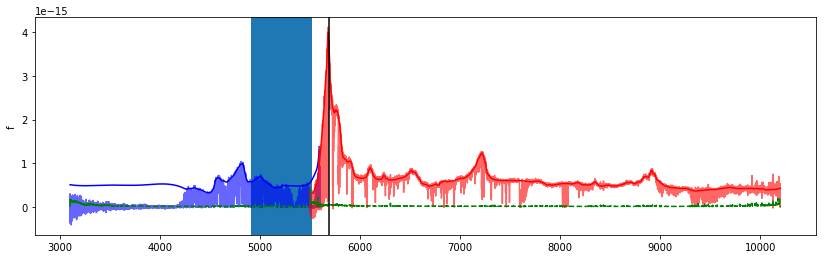

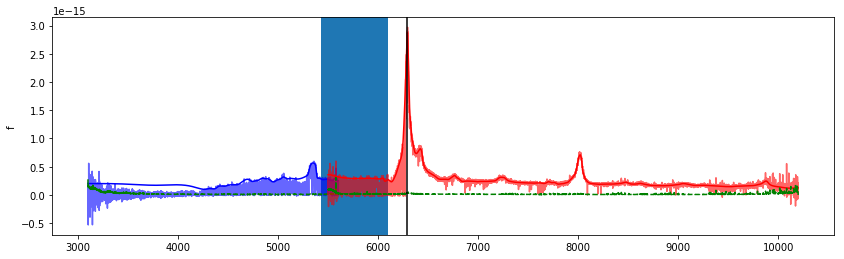

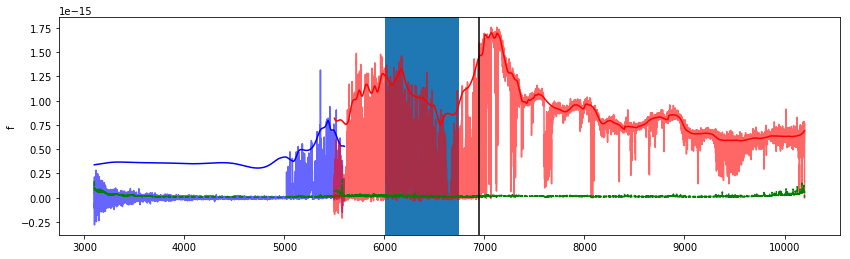

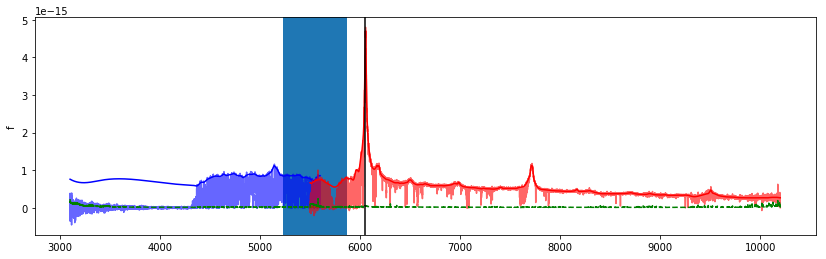

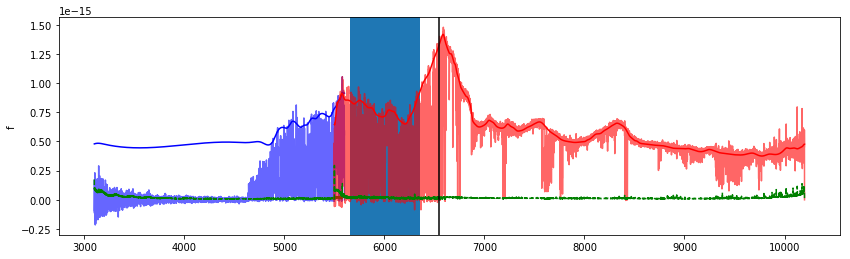

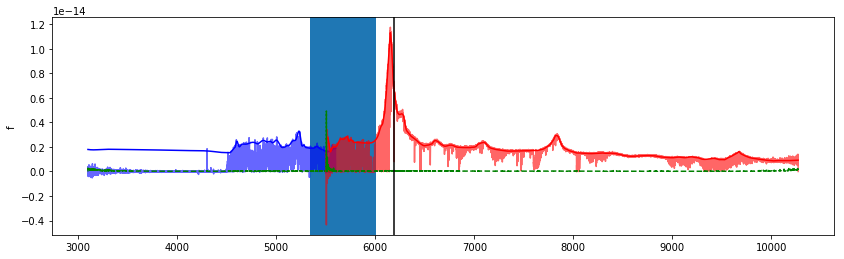

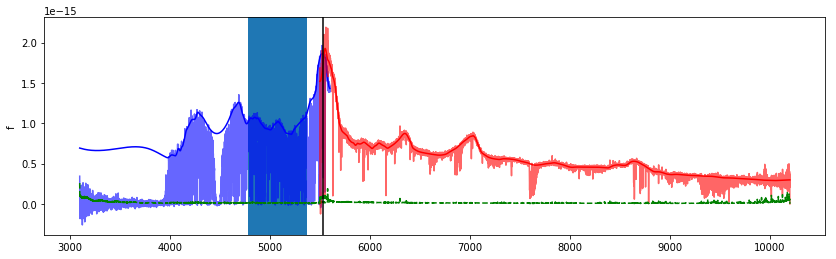

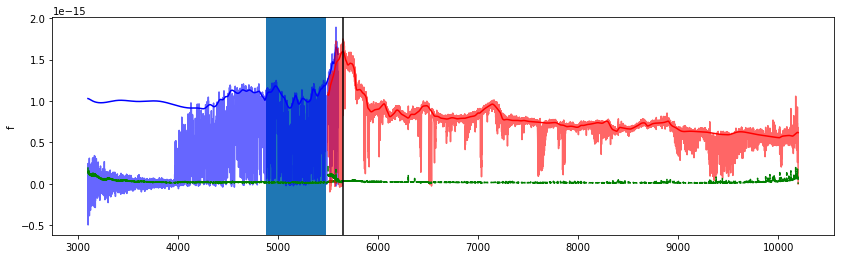

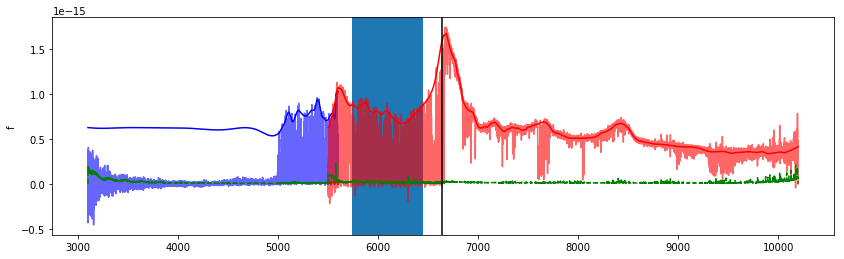

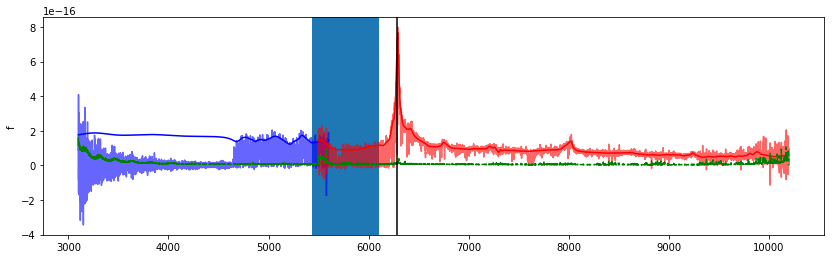

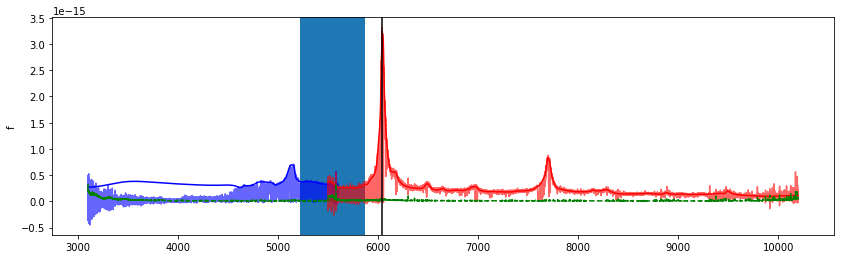

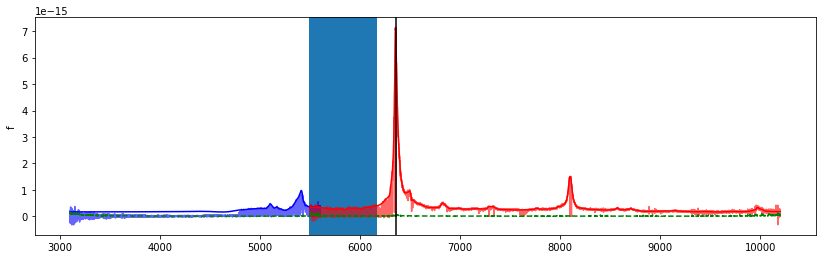

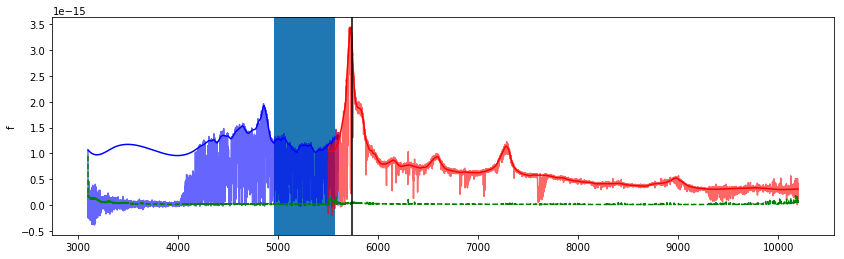

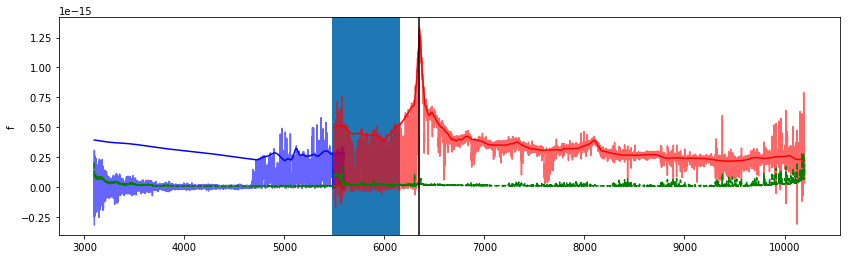

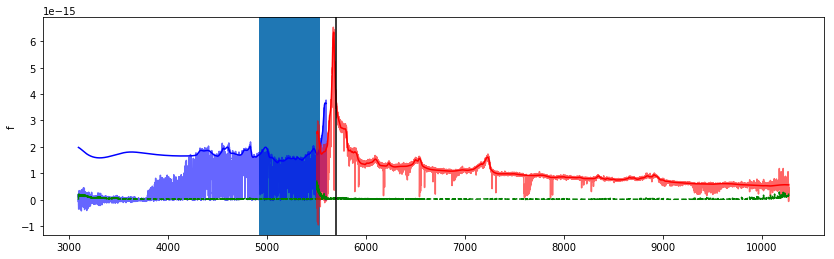

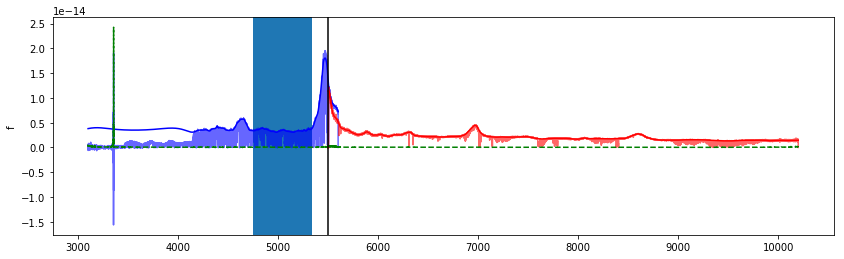

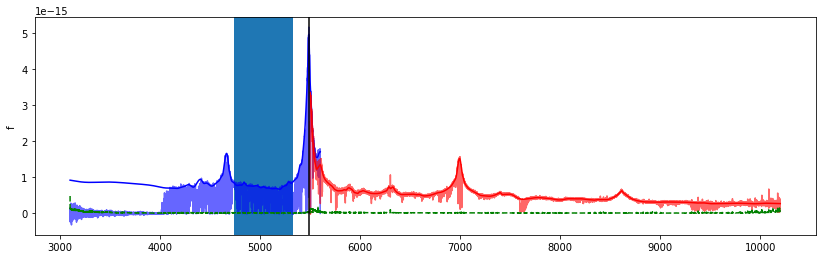

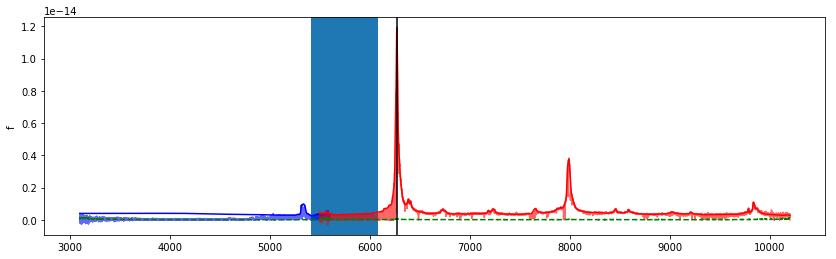

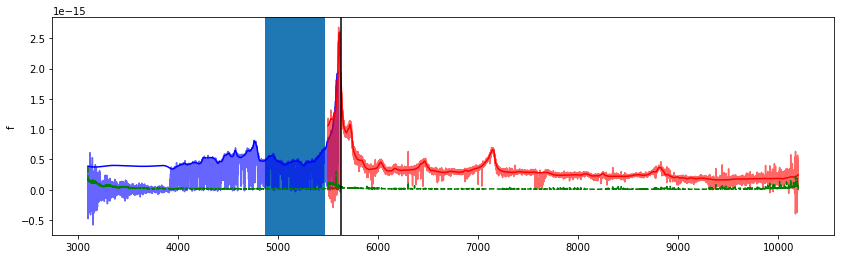

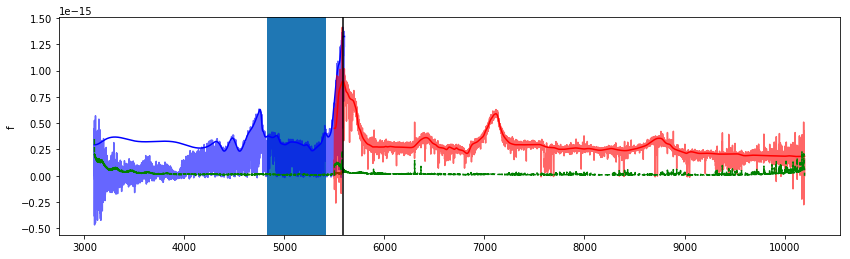

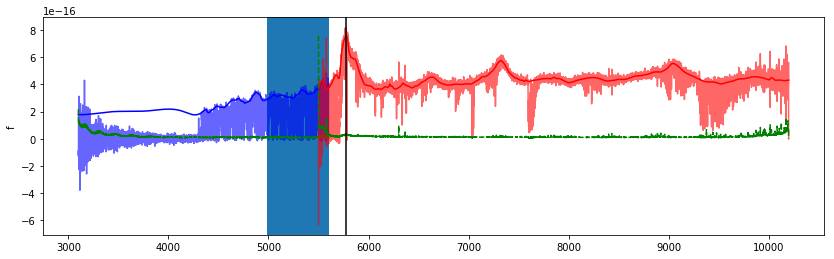

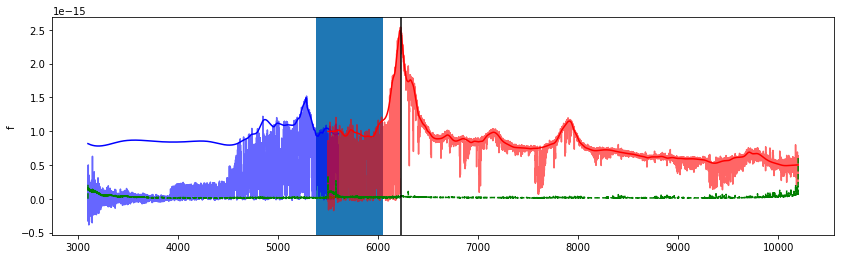

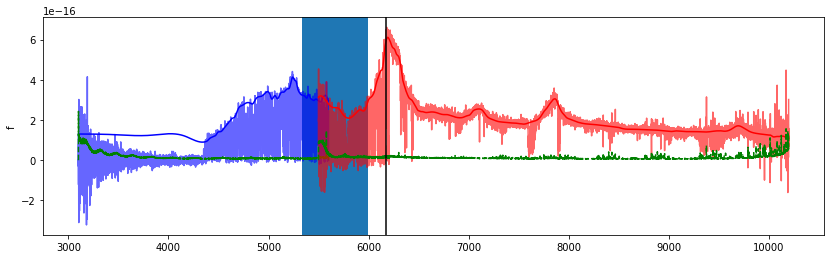

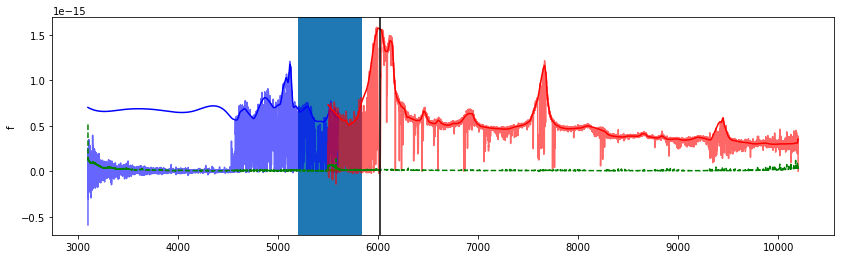

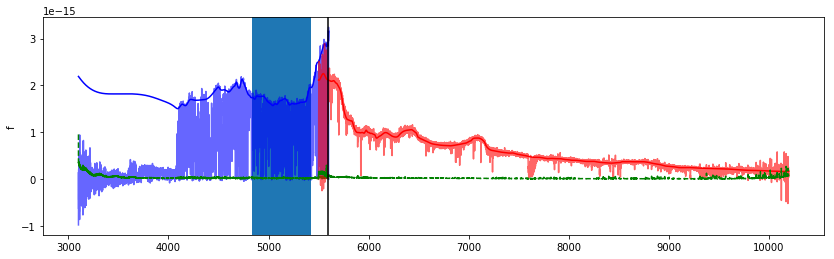

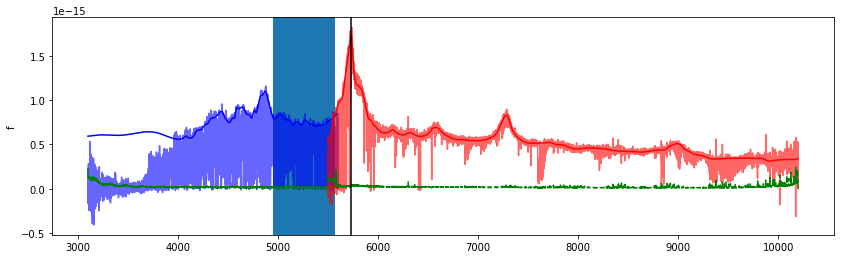

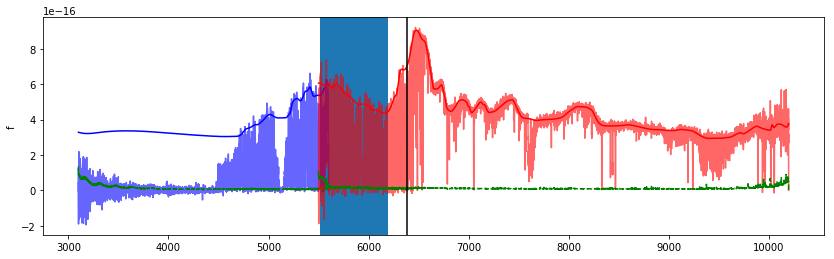

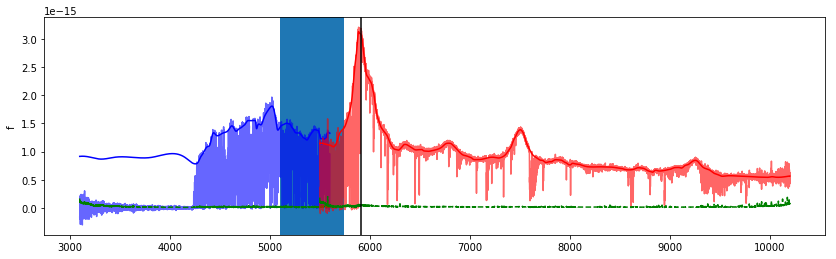

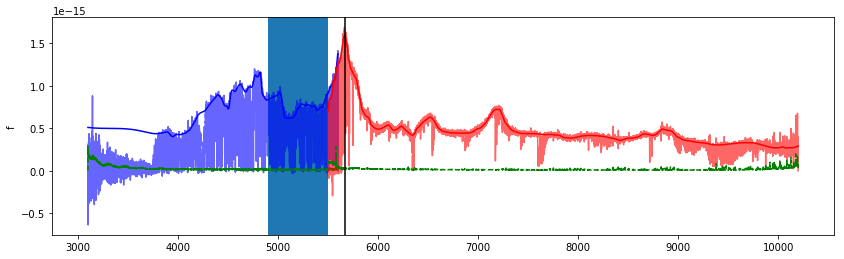

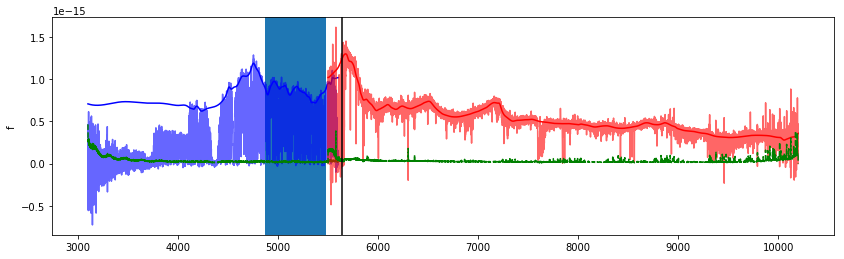

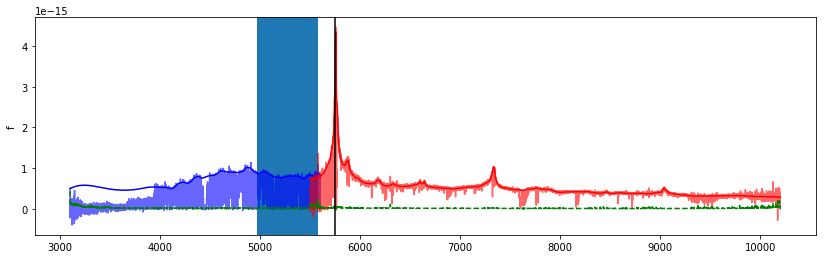

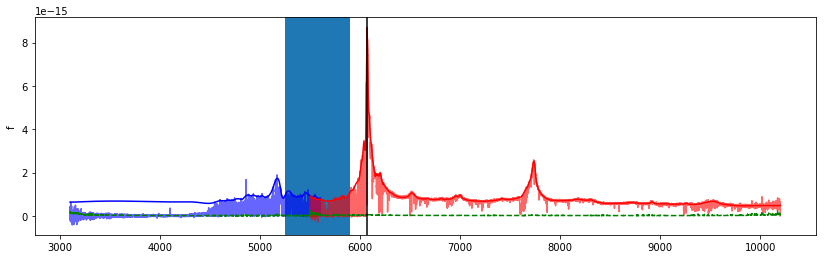

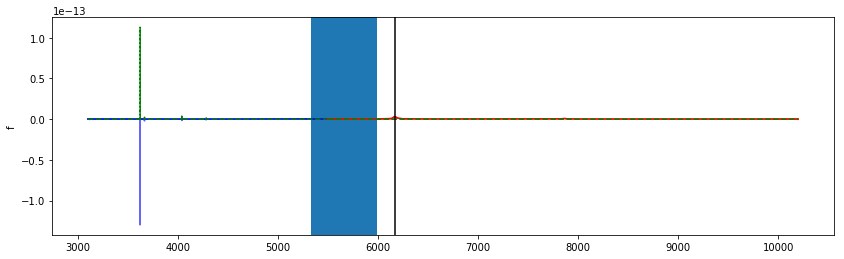

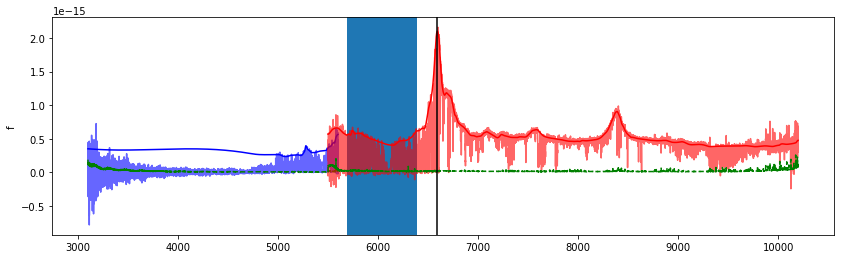

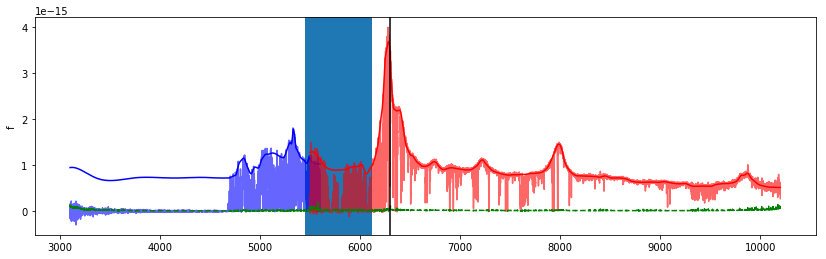

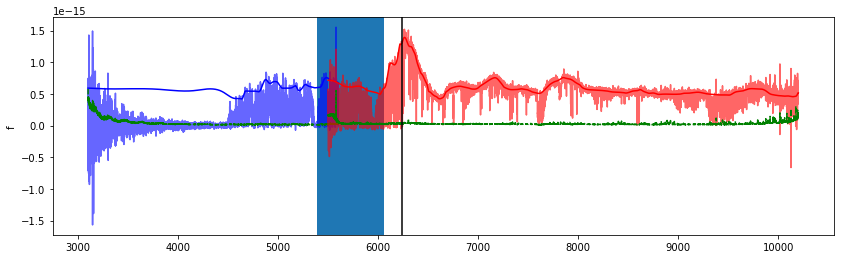

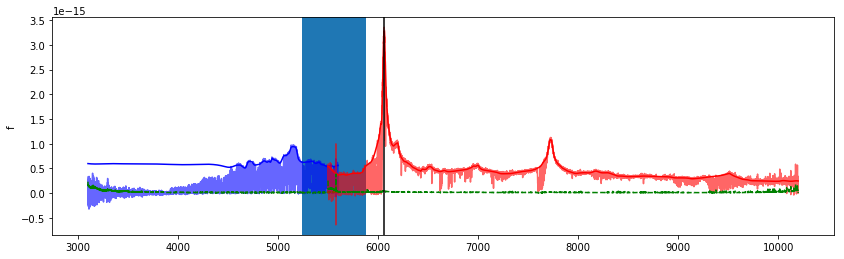

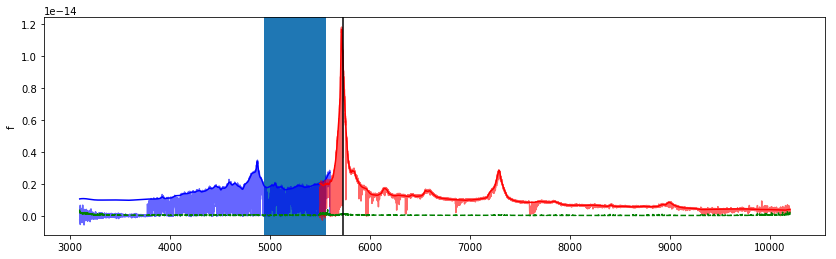

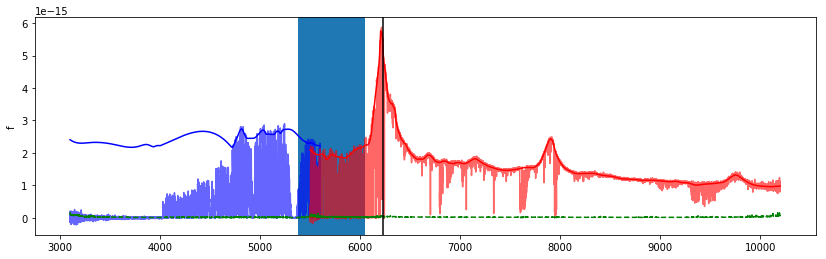

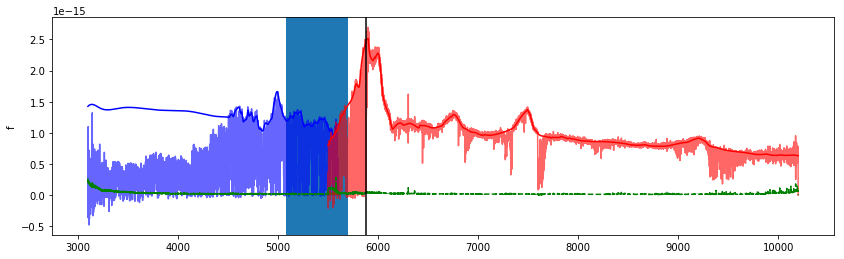

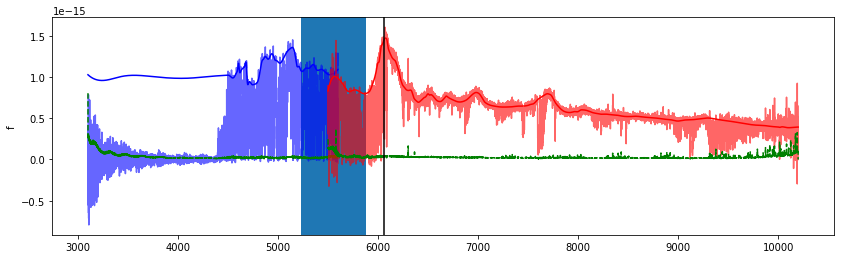

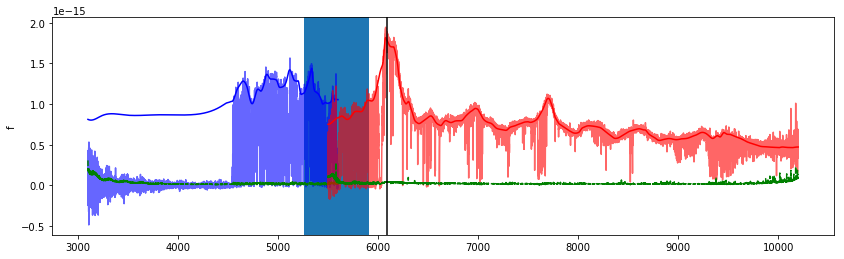

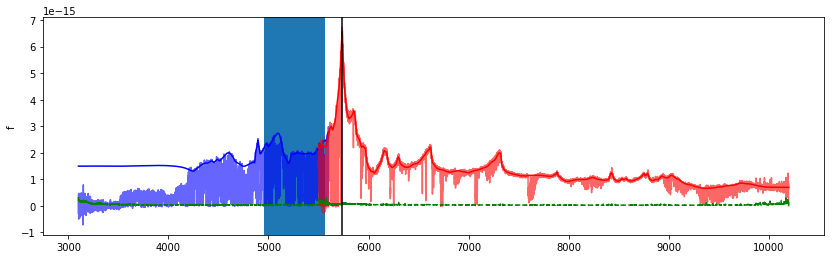

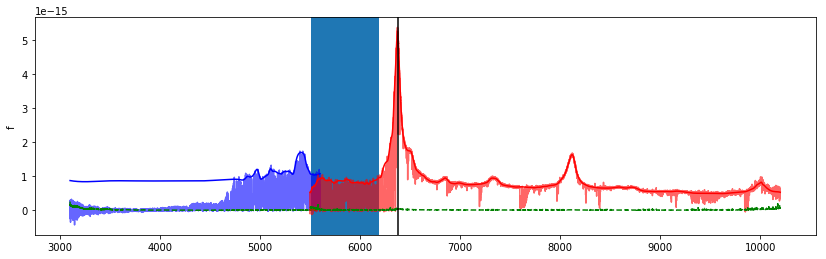

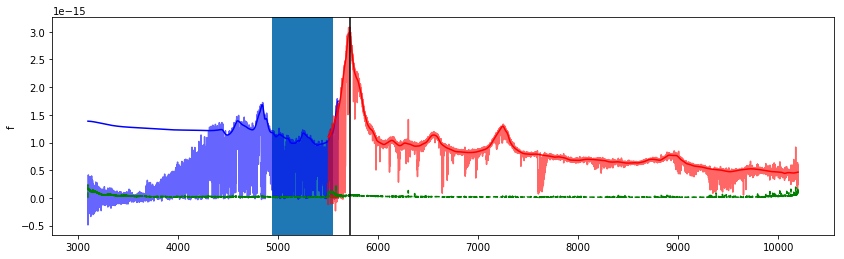

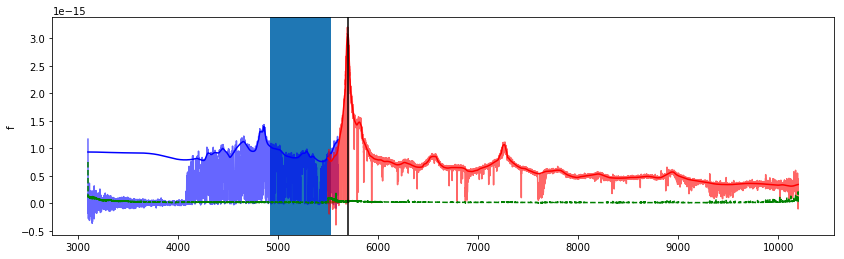

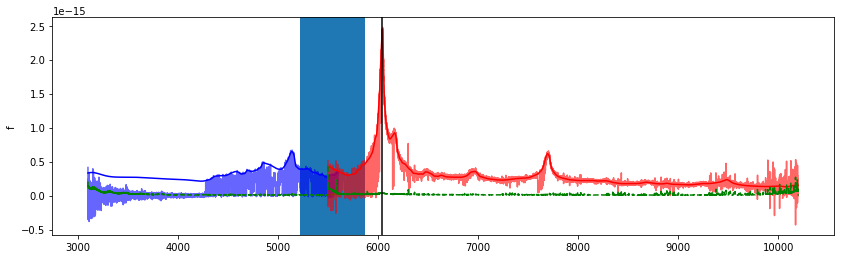

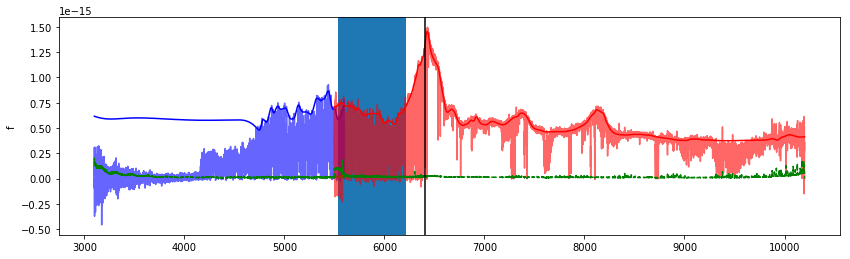

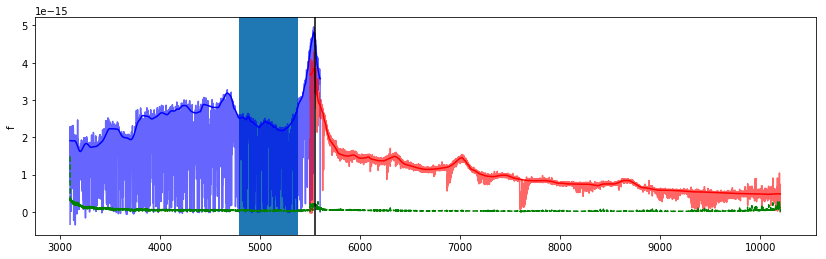

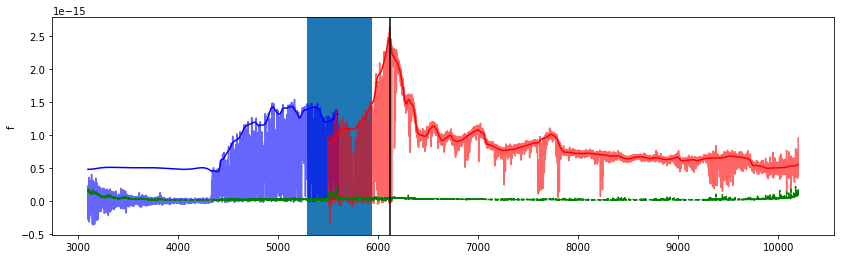

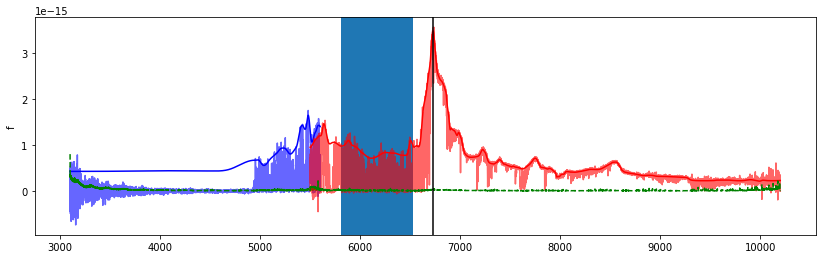

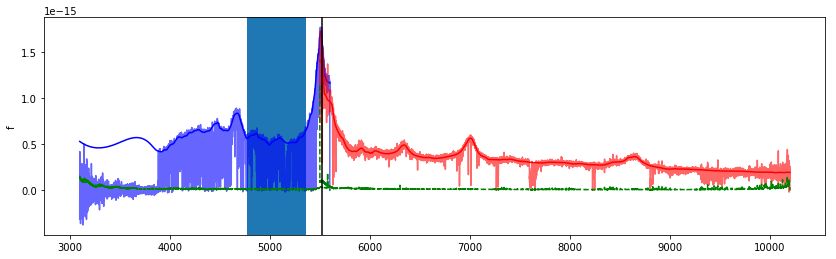

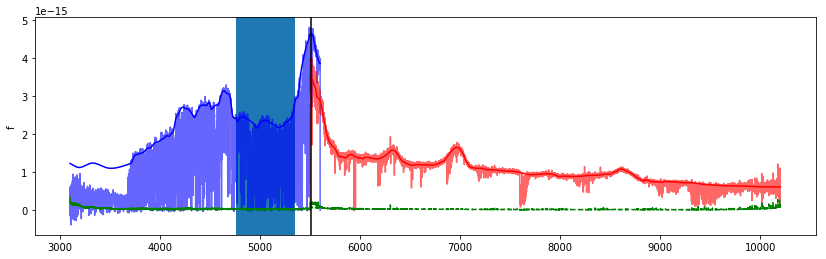

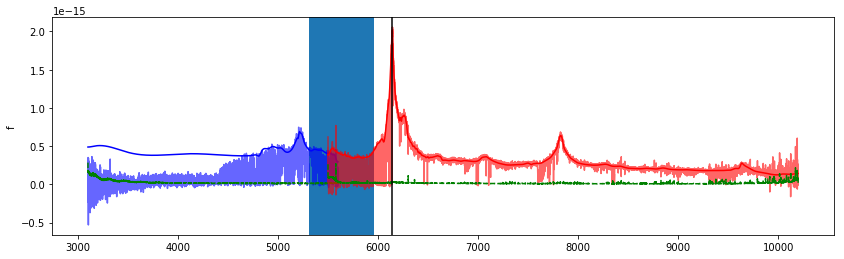

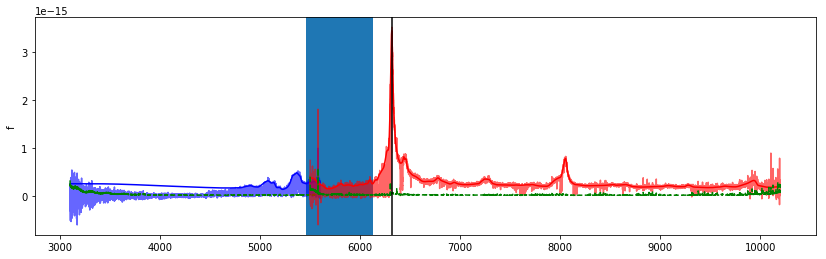

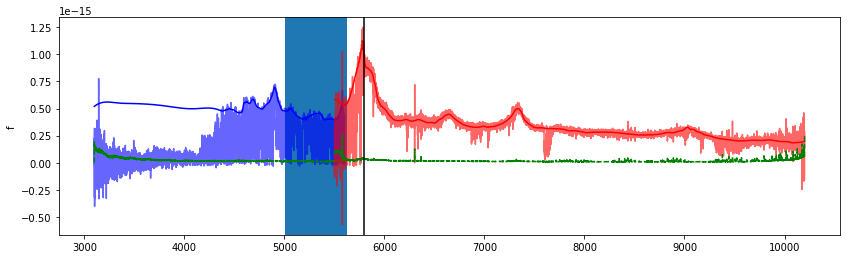

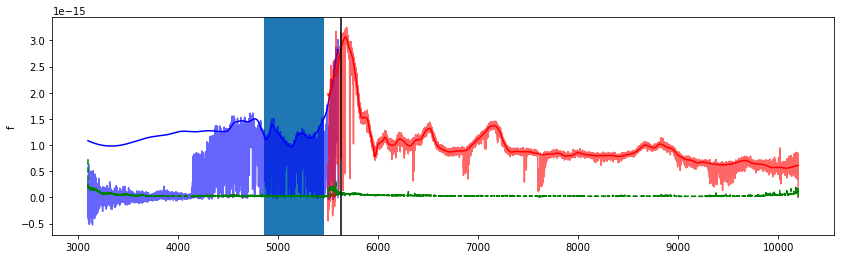

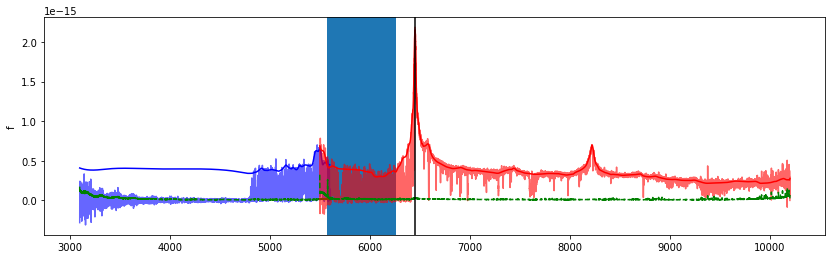

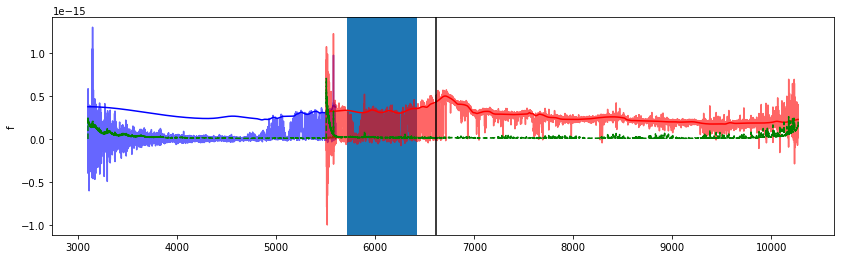

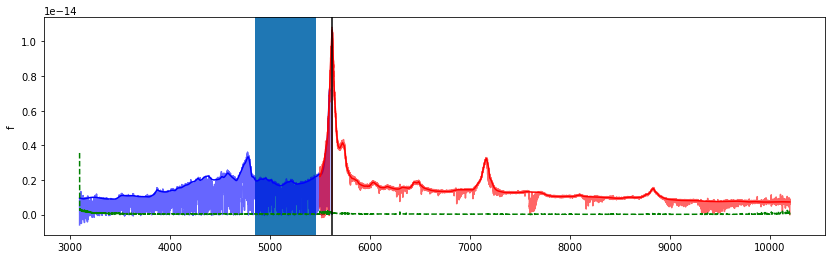

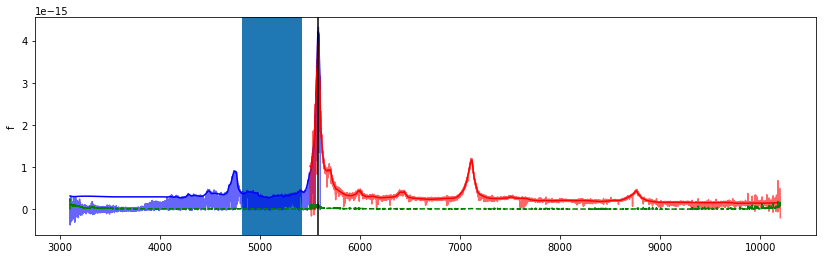

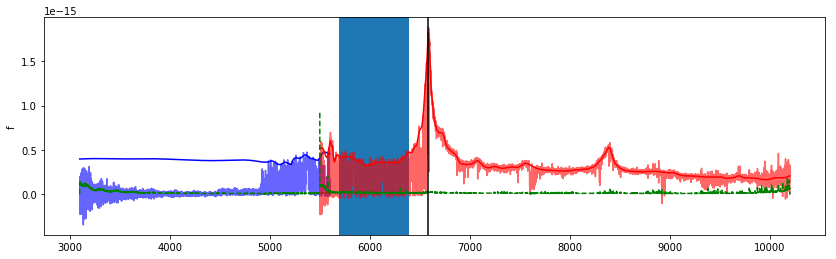

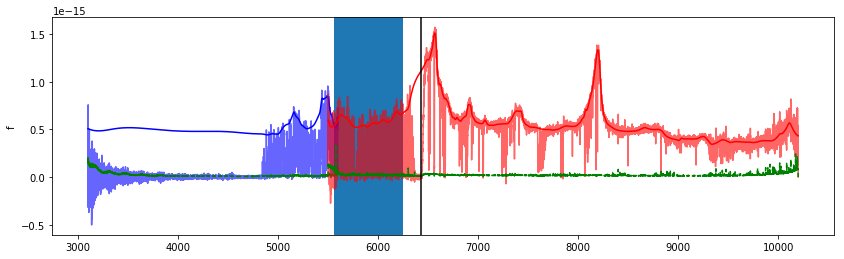

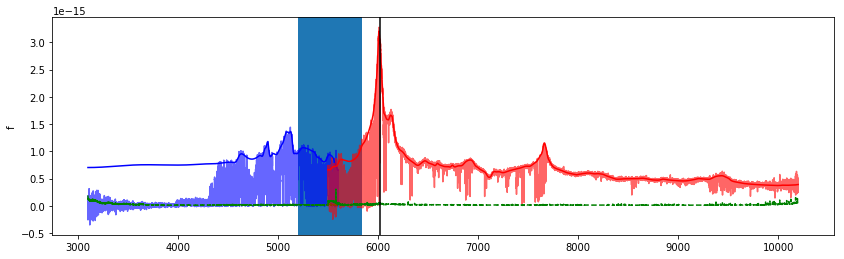

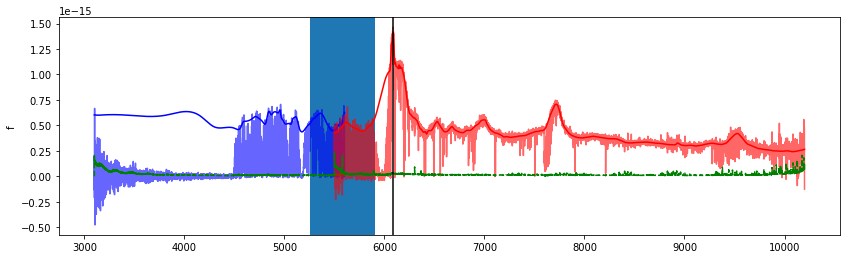

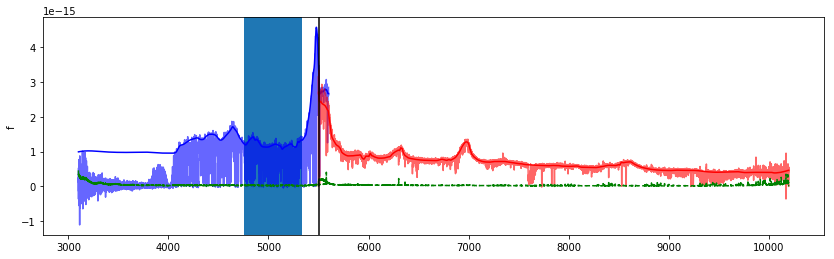

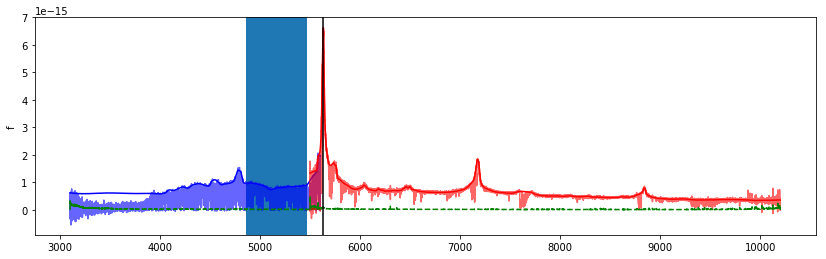

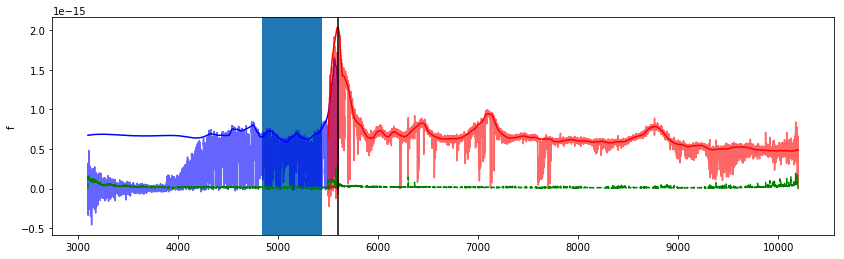

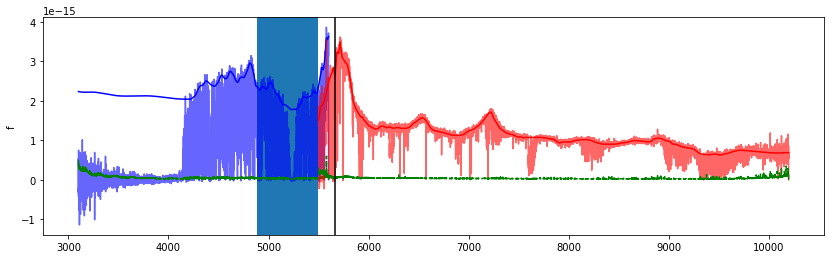

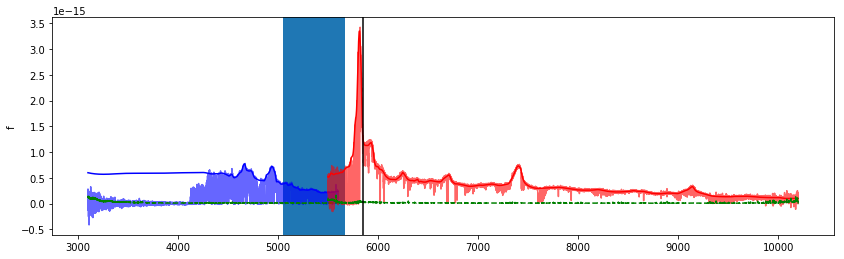

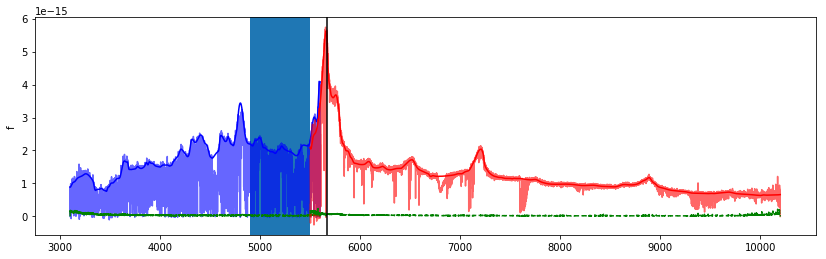

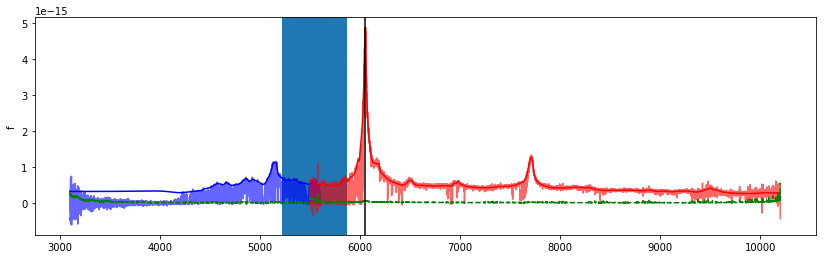

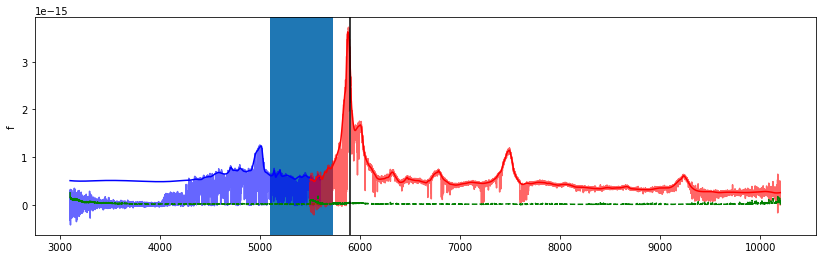

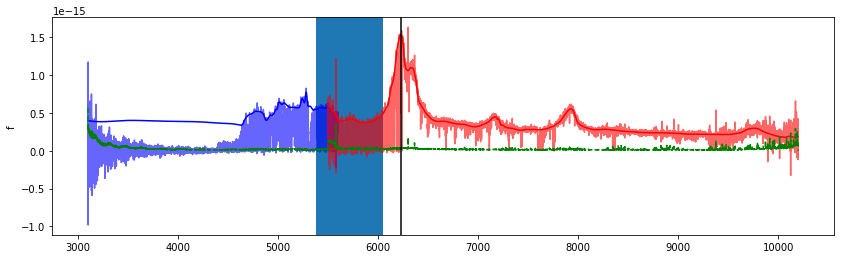

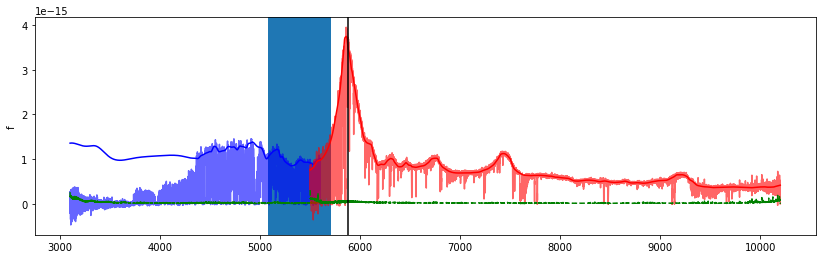

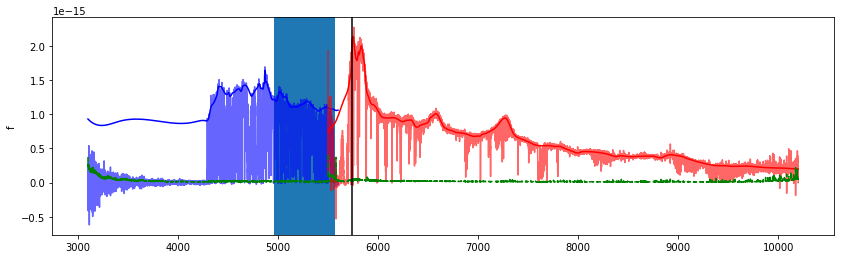

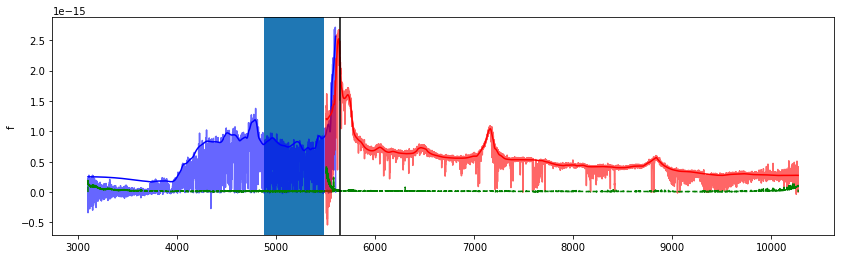

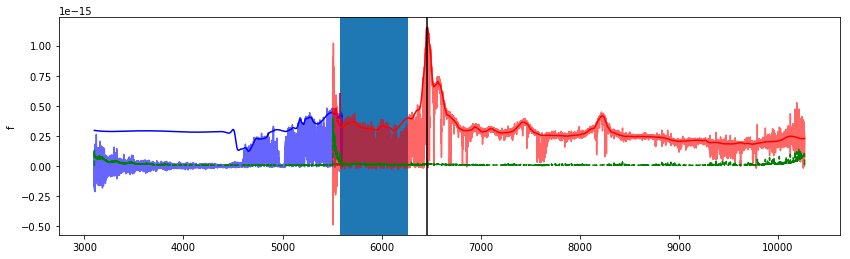

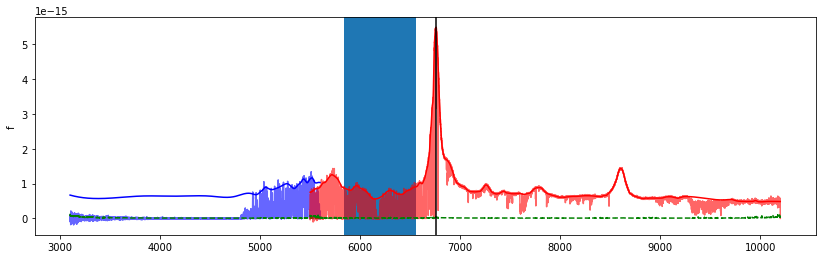

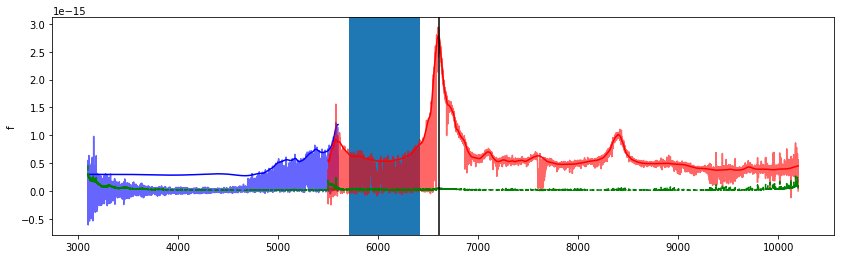

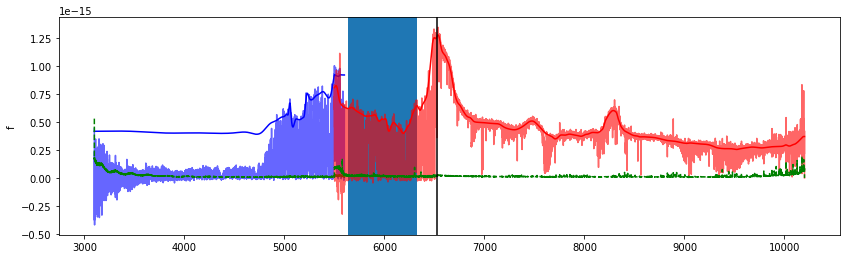

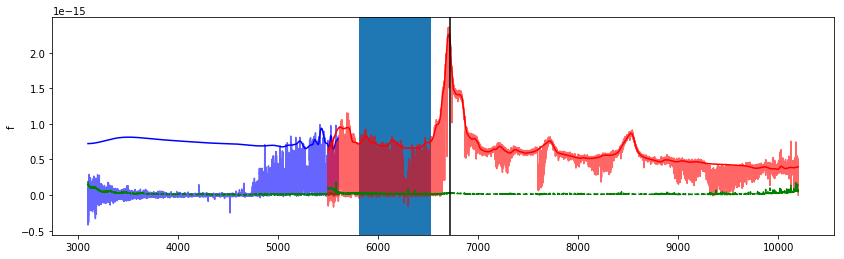

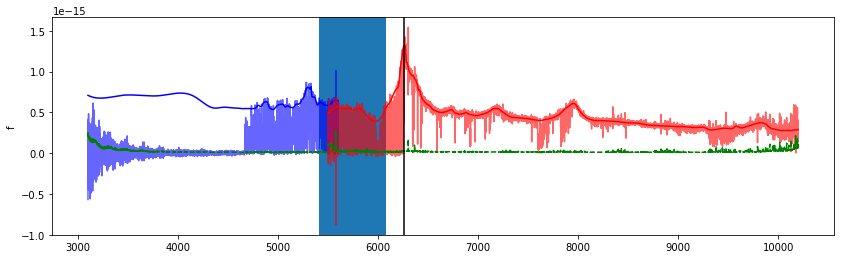

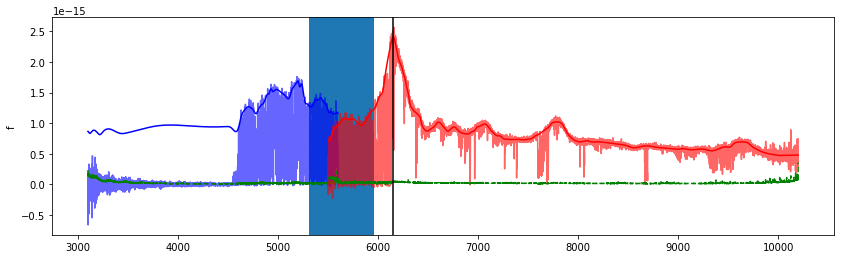

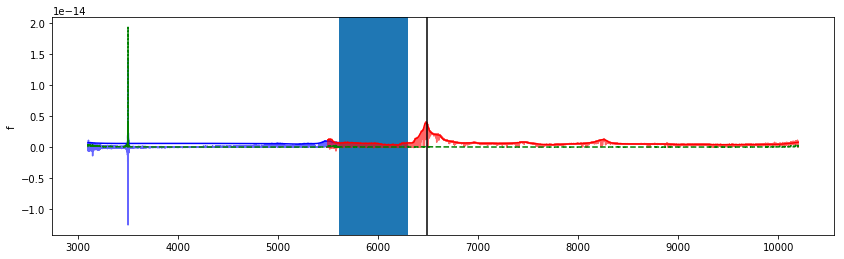

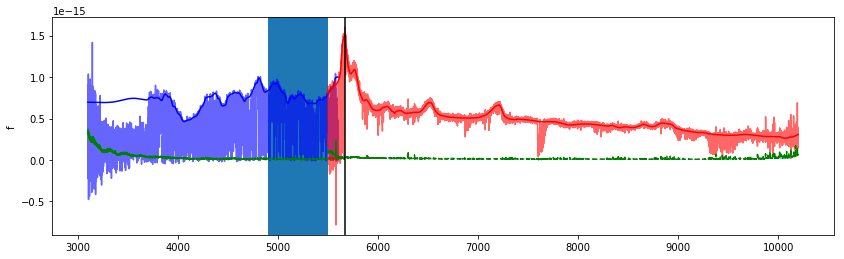

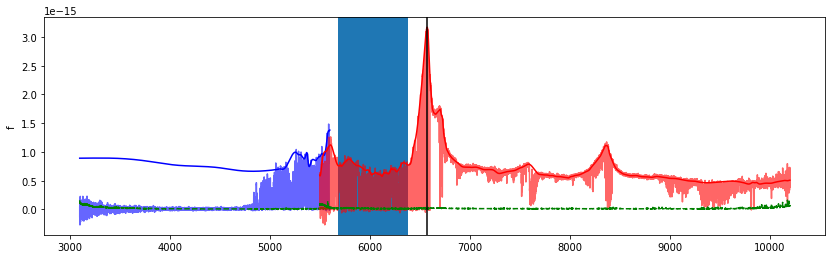

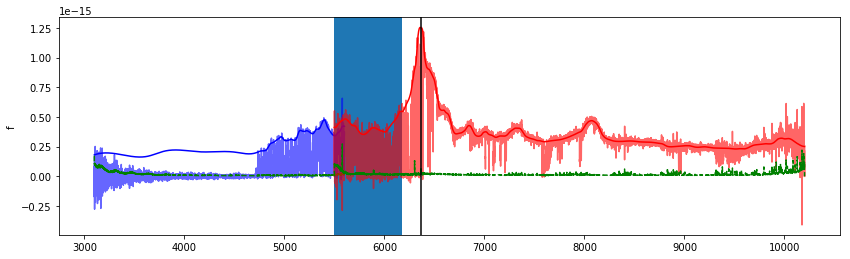

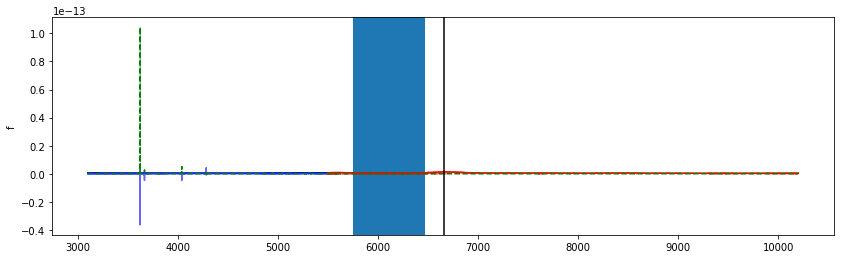

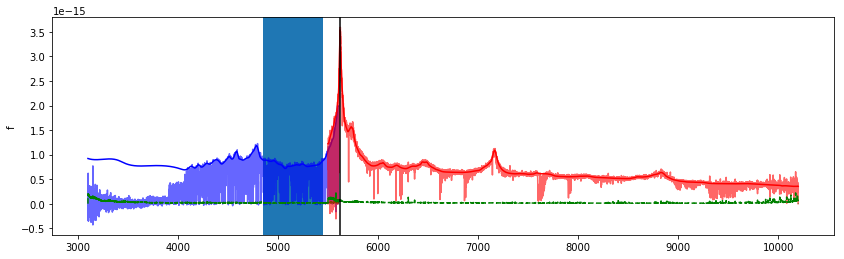

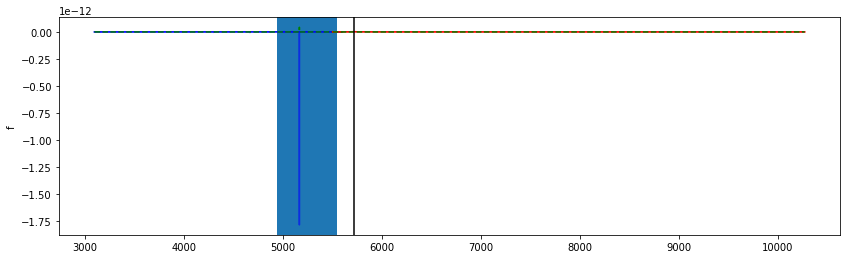

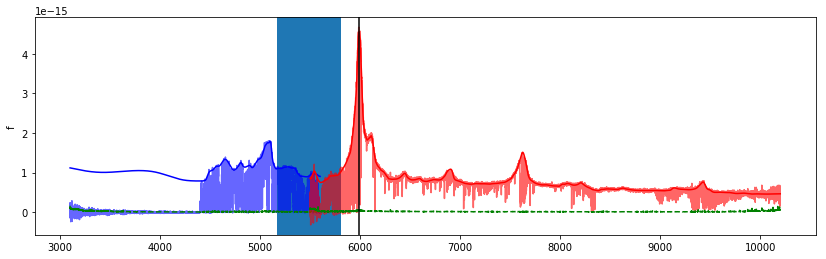

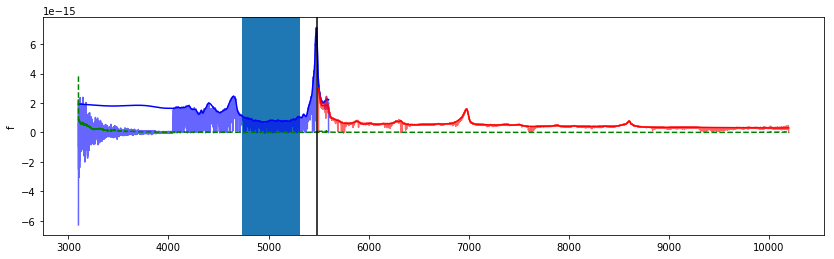

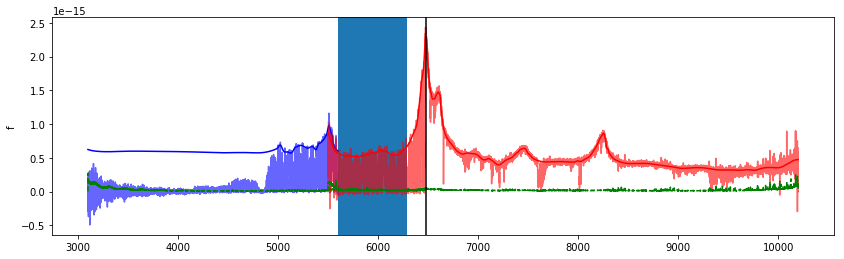

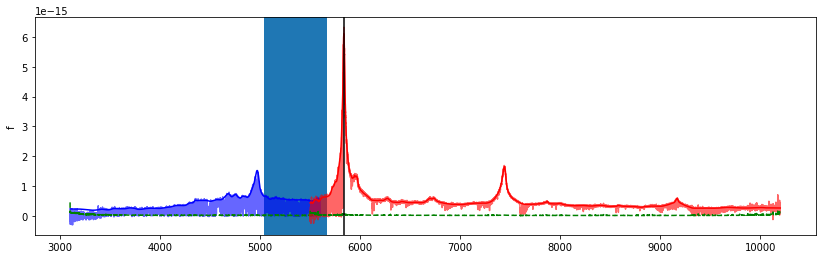

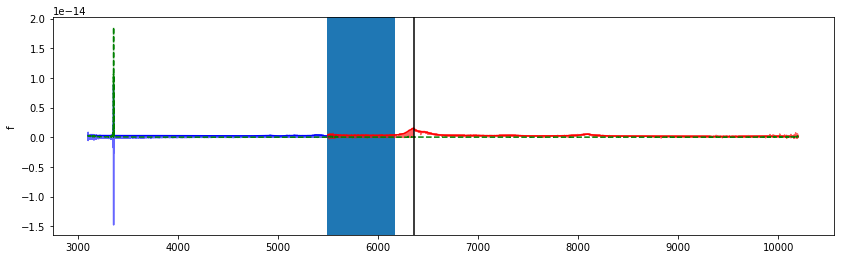

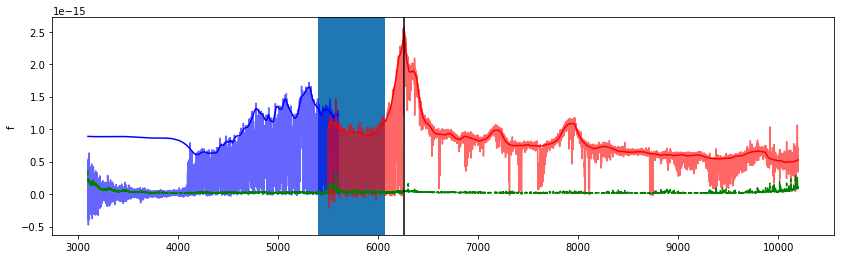

In [11]:
for f in os.listdir("/Users/nk452/repos/data/xq100/uvb/"):
    if not f.endswith(".fits"):
        continue
    
    uvbpath = os.path.join("/Users/nk452/repos/data/xq100/uvb/", f)
    vispath = uvbpath.replace("uvb","vis")
    ufits = xio.XQ100Fits(uvbpath)
    vfits = xio.XQ100Fits(vispath)
    
    fig = plt.figure(figsize=(14,4))
    cu = ufits.cont
    plt.plot(ufits.wave, ufits.flux*cu, "b-", alpha=0.6)
    plt.plot(ufits.wave, cu, "b-")
    plt.plot(ufits.wave, ufits.error*cu, "g--")
    
    cv = vfits.cont
    plt.plot(vfits.wave, vfits.flux*cv, "r-", alpha=0.6)
    plt.plot(vfits.wave, cv, "r-")
    plt.plot(vfits.wave, vfits.error*cv, "g--")
    plt.ylabel("f")
    
    plt.axvline(fid.LYA_WAVELENGTH *(1+ufits.z_qso), c='k')
    plt.axvspan(fid.LYA_FIRST_WVL*(1+ufits.z_qso), fid.LYA_LAST_WVL*(1+ufits.z_qso))

    plt.show()
    